# Annotation

In [14]:

import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import keras.layers
import math
import sys
import sklearn
import scipy

from sklearn import metrics
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

In [15]:
# Get complete file path to file for annotation
def get_path(df):
    if df == True:
        return os.getcwd()+'/output3/train/'
    else:
        return os.getcwd()+'/output3/test/'
    
ann = pd.read_csv(os.getcwd()+'/slovo/annotations.csv', sep='\t')
ann['file_path'] = ann['train'].apply(get_path)
ann['file_path'] = ann['file_path'] + ann['attachment_id'] + '.parquet'
ann.head()
ann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   attachment_id  20400 non-null  object 
 1   text           20400 non-null  object 
 2   user_id        20400 non-null  object 
 3   height         20400 non-null  int64  
 4   width          20400 non-null  int64  
 5   length         20400 non-null  float64
 6   train          20400 non-null  bool   
 7   begin          20400 non-null  int64  
 8   end            20400 non-null  int64  
 9   file_path      20400 non-null  object 
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 1.4+ MB


In [16]:
classes_text = ann['text'].unique()
ann = ann[ann['text'].isin(classes_text)]
ann.info()

['Ё' 'А' 'Р' ... 'время 11 часов' 'навсегда' 'no_event']
['Ё', 'А', 'Р', 'Е', 'Ч', 'Л', 'Ц', 'С', 'Й', 'З', 'Ь', 'Я', 'Б', 'Щ', 'У', 'Ы', 'Д', 'Ф', 'Т', 'Ъ', 'О', 'М', 'П', 'Х', 'Э', 'Н', 'В', 'Ю', 'Ш', 'Ж', 'Г', 'К', 'И', 'козел', 'гнездо', 'вой', 'креветка', 'бегемот', 'нашествие', 'лиса', 'динозавр', 'перо', 'крокодил', 'летучая мышь', 'дикое животное', 'попугай', 'ежик', 'волк', 'овца', 'петух', 'белка', 'пингвин', 'помесь', 'осел', 'дятел', 'воротник', 'аллигатор', 'кошка', 'рога', 'лошадь', 'жираф', 'вол', 'населять', 'верблюд', 'коза', 'ползанье', 'бабочка', 'клюв', 'собака', 'кролик', 'паук', 'водоплавающее', 'носорог', 'мышь', 'зверь', 'плавник', 'паучья сеть', 'животное', 'лев', 'тигр', 'миграция', 'копыто', 'зубы', 'коготь', 'рыба', 'лось', 'пчела', 'птица', 'комар', 'змея', 'гавканье', 'бык', 'зоопарк', 'клевать', 'акула', 'рычать', 'панда', 'крыса', 'олень', 'делать выводы', 'no_event']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data column

In [17]:
def delete_space(df):
    return df.replace(" ", "_")
ann['text'] = ann['text'].apply(delete_space)

In [18]:
# Reduce the annotation
directory = os.getcwd()+'/output3'

test_videos = os.listdir(directory+'/test')
train_videos = os.listdir(directory+'/train')

videos = test_videos + train_videos

ids_we_have = [file_name.split(".")[0] for file_name in videos]
ann = ann[ann['attachment_id'].isin(ids_we_have)]
ann.head()

,attachment_id,text,user_id,height,width,length,train,begin,end,file_path
0,44e8d2a0-7e01-450b-90b0-beb7400d2c1e,Ё,185bd3a81d9d618518d10abebf0d17a8,1920,1080,156.0,True,36,112,/Users/ekaterinaaleksandrovna/Documents/diplom...
1,df5b08f0-41d1-4572-889c-8b893e71069b,А,185bd3a81d9d618518d10abebf0d17a8,1920,1080,150.0,True,36,76,/Users/ekaterinaaleksandrovna/Documents/diplom...
2,17f53df4-c467-4aff-9f48-20687b63d49a,Р,185bd3a81d9d618518d10abebf0d17a8,1920,1080,133.0,True,40,97,/Users/ekaterinaaleksandrovna/Documents/diplom...
3,e3add916-c708-4339-ad98-7e2740be29e9,Е,185bd3a81d9d618518d10abebf0d17a8,1920,1080,144.0,True,43,107,/Users/ekaterinaaleksandrovna/Documents/diplom...
4,bd7272ed-1850-48f1-a2a8-c8fed523dc37,Ч,185bd3a81d9d618518d10abebf0d17a8,1920,1080,96.0,True,20,70,/Users/ekaterinaaleksandrovna/Documents/diplom...


In [306]:
sample = pd.read_parquet('output3/train/0a0c3220-ae95-4919-a1df-3f7e538067cb.parquet')
print(f"Sample shape = {sample.shape}")
sample.sample(30)

Sample shape = (40182, 7)


,frame,row_id,type,landmark_index,x,y,z
6587,12,12_face_71,face,71,0.511031,0.152235,0.041330
2916,5,5_face_201,face,201,0.548472,0.327904,-0.022668
8080,14,14_left_hand_10,left_hand,10,0.513808,0.366500,-0.012819
17791,32,32_face_415,face,415,0.582521,0.294306,-0.010959
26427,48,48_face_363,face,363,0.571996,0.229127,-0.022708
16618,30,30_face_328,face,328,0.573286,0.257262,-0.015956
40168,73,73_pose_19,pose,19,0.518357,0.817841,-0.754712
32029,58,58_pose_25,pose,25,0.660468,1.673031,-0.034821
16532,30,30_face_242,face,242,0.562179,0.253170,-0.019812
24702,45,45_face_267,face,267,0.568458,0.282154,-0.019803


In [307]:
sample_left_hand = sample[sample.type == "left_hand"]
sample_right_hand = sample[sample.type == "right_hand"]

print(f"Percentage of nulls in Left Hand data = {100*np.mean(sample_left_hand['x'].isnull()):.02f} %")
print(f"Percentage of nulls in Right Hand data = {100*np.mean(sample_right_hand['x'].isnull()):.02f} %")

Percentage of nulls in Left Hand data = 0.00 %
Percentage of nulls in Right Hand data = 0.00 %


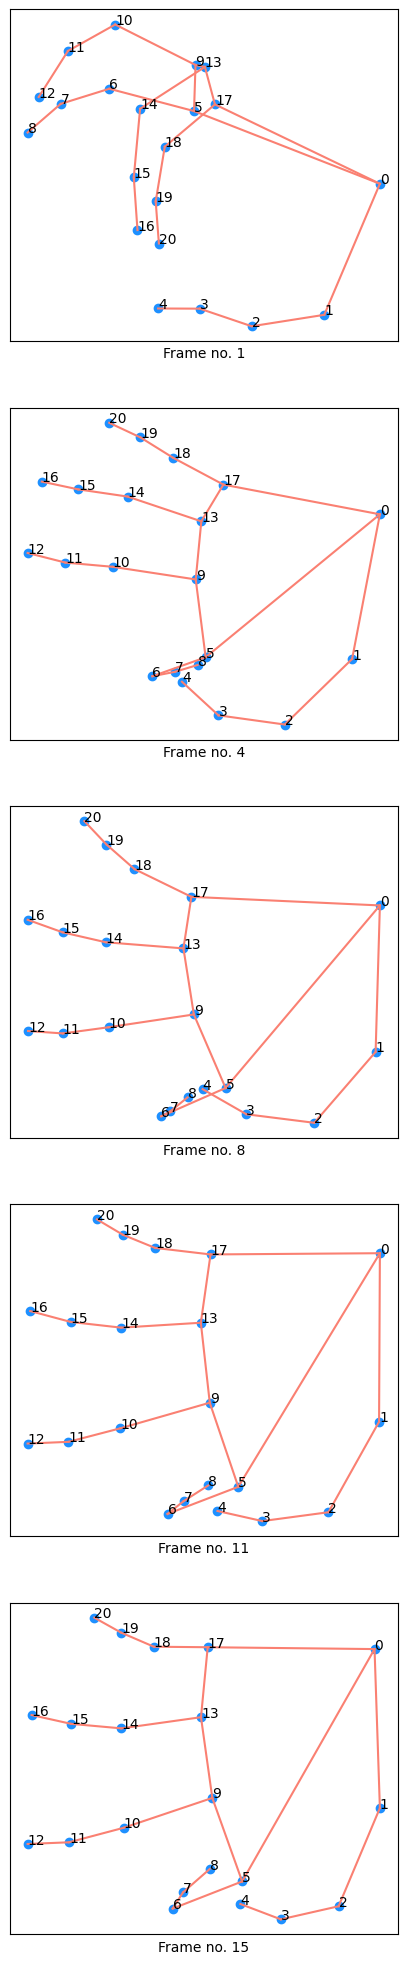

In [308]:
edges = [(0,1),(1,2),(2,3),(3,4),(0,5),(0,17),(5,6),(6,7),(7,8),(5,9),(9,10),(10,11),(11,12),
         (9,13),(13,14),(14,15),(15,16),(13,17),(17,18),(18,19),(19,20)]

def plot_frame(df, frame_id, ax):
    df = df[df.frame == frame_id].sort_values(['landmark_index'])
    x = list(df.x)
    y = list(df.y)
    
    ax.scatter(df.x, df.y, color='dodgerblue')
    for i in range(len(x)):
        ax.text(x[i], y[i], str(i))
        
    for edge in edges:
        ax.plot([x[edge[0]], x[edge[1]]], [y[edge[0]], y[edge[1]]], color='salmon')
        ax.set_xlabel(f"Frame no. {frame_id}")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])

    
def plot_frame_seq(df, frame_range, n_frames):
    frames = np.linspace(frame_range[0],frame_range[1],n_frames, dtype = int, endpoint=True)
    fig, ax = plt.subplots(n_frames, 1, figsize=(5,25))
    for i in range(n_frames):
        plot_frame(df, frames[i], ax[i])
        
    plt.show()

    
plot_frame_seq(sample_left_hand, (1,15), 5)

# Config

In [19]:

import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2
import itertools
import plotly.express as px
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
mp_face_mesh = mp.solutions.face_mesh
mp_pose = mp.solutions.pose
colors = ["#0F9D58","#4285F4","#F4B400"]
# contour connections
CONTOURS = list(itertools.chain(*mp_face_mesh.FACEMESH_CONTOURS))

def create_blank_image(height, width):
    return np.zeros((height, width, 3), np.uint8)

def draw_landmarks(data, image, frame_id, 
                   landmark_type, connection_type, 
                   landmark_color=(255, 0, 0), connection_color=(0, 20, 255), 
                   thickness=2, circle_radius=1):
    """Draws landmarks"""
    df = data.groupby(['frame', 'type']).get_group((frame_id, landmark_type)).copy()
    if landmark_type == 'face':
        df.loc[~df['landmark_index'].isin(CONTOURS),'x'] = float('NaN') #-1*df[~df['landmark_index'].isin(CONTOURS)]['x'].values

        
    landmarks = [landmark_pb2.NormalizedLandmark(x=lm.x, y=lm.y, z=lm.z) for idx, lm in df.iterrows()]
    landmark_list = landmark_pb2.NormalizedLandmarkList(landmark = landmarks)
    #print(len(landmark_list.landmark))
    mp_drawing.draw_landmarks(
        image=image,
        landmark_list=landmark_list, 
        connections=connection_type,
        landmark_drawing_spec=mp_drawing.DrawingSpec(
            color=landmark_color, 
            thickness=thickness, 
            circle_radius=circle_radius),
        connection_drawing_spec=mp_drawing.DrawingSpec(
            color=connection_color, 
            thickness=thickness, 
            circle_radius=circle_radius))
    return image
from plotly.subplots import make_subplots

def read_landmark_data_by_id(sequence_id, train_data):
    """Reads the landmark data by the given sequence id."""
    print(sequence_id)
    file_path = train_data[train_data.attachment_id==sequence_id]['file_path']
    return read_landmark_data_by_path(file_path)

def read_landmark_data_by_path(file_path, input_root='output3/train'):
    """Reads landmak data by the given file path."""
    data = pd.read_parquet('output3/train/5b8c0dc5-46e9-4689-9da5-81a246080391.parquet')
    return data.set_index('row_id')

def get_ids(df, row):
    user_id = df.user_id.values[row]
    attachment_id = df.attachment_id.values[row]
    
    return user_id, attachment_id

def draw_data(user_id, attachment_id, train_data):
    height = 700
    width = 500

    # Read and get frames
    data = read_landmark_data_by_id(attachment_id, train_data)
    frame_ids = data.frame.unique().tolist()
    buttons_ids = []
    buttons_seq_ids = []
    buttons=[]

    fig = make_subplots(rows=2, cols=3,
                    specs=[[{}, {},{"rowspan": 2}],
                           [{}, {},None]],
                    vertical_spacing=0.1,
                    subplot_titles=('Face',  'Pose',
                                    'All',  'Left Hand',
                                    'Right Hand'),
                    print_grid=False)

    buttons_seq_ids.append(dict(label=f"{user_id}",
                                method="restyle",
                                args=[{"visible": None}]
                                ))
    buttons_ids.append(dict(label=f"{attachment_id}",
                                method="restyle",
                                args=[{"visible": None}]
                                ))

    for i,frame_id in enumerate(frame_ids): 
        r_hand = draw_landmarks(data, image=create_blank_image(height, width ), 
                              frame_id=frame_id,
                              landmark_type = 'right_hand', 
                              connection_type = mp_hands.HAND_CONNECTIONS,
                              landmark_color=(255, 0, 0),
                              connection_color=(0, 20, 255), 
                              thickness=3, 
                              circle_radius=3)


        l_hand = draw_landmarks(data, image=create_blank_image(height, width), 
                              frame_id=frame_id,
                              landmark_type = 'left_hand', 
                              connection_type = mp_hands.HAND_CONNECTIONS,
                              landmark_color=(255, 0, 0),
                              connection_color=(0, 20, 255), 
                              thickness=3, 
                              circle_radius=3)



        face = draw_landmarks(data, image=create_blank_image(height, width), 
                              frame_id=frame_id,
                              landmark_type='face', 
                              connection_type= mp_face_mesh.FACEMESH_CONTOURS,
                              landmark_color=(255, 255, 255),
                              connection_color=(0, 255, 0),
                              thickness=1, 
                              circle_radius=1)

        pose = draw_landmarks(data, image=create_blank_image(height, width), 
                               frame_id=frame_id,
                               landmark_type='pose', 
                               connection_type= mp_pose.POSE_CONNECTIONS,
                               landmark_color=(255, 255, 255),
                               connection_color=(255, 0, 0),
                               thickness=2, 
                               circle_radius=2)

        fig.add_trace(px.imshow(face).data[0], row=1, col=1)
        fig.add_trace(px.imshow(pose).data[0], row=1, col=2)
        fig.add_trace(px.imshow(l_hand).data[0], row=2, col=1)
        fig.add_trace(px.imshow(r_hand).data[0], row=2, col=2)
        fig.add_trace(px.imshow(face+pose+l_hand+r_hand, aspect='auto').data[0], row=1, col=3)

        visible=[False,False,False,False,False]*len(frame_ids)
        visible[i*5:i*5+5]=[True]*5
        buttons.append(dict(label=f"{frame_id}",
                            method="update",
                            args=[{"visible": visible}]))  

    sign = ann.query('attachment_id == @attachment_id')['text'].values[0]

    fig.update_layout(
        title={
            'text': f'<b>Sign: {sign}',
            'font': dict(size=20,family="Georgia",color=colors[1]),
            'y':0.98,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},


        template="plotly_white",
        width= 800,
        height=600,
        showlegend=True,


        updatemenus=[
            # Participant_ID
            dict(
                # customize dropdown
                active=0,
                direction="down",
                pad={"r": 50, "t": 25},
                showactive=True,
                x=0.1,
                xanchor="left",
                y=1.2,
                yanchor="top",

                # customize button      
                buttons=buttons_ids),

            # Sequence_ID
            dict(
                # customize dropdown
                active=0,
                direction="down",
                pad={"r": 50, "t": 25},
                showactive=True,
                x=0.43,
                xanchor="left",
                y=1.2,
                yanchor="top",

                # customize button      
                buttons=buttons_seq_ids),

            # Frames_ID
            dict(
                # customize dropdown
                active=0,
                direction="down",
                pad={"r": 50, "t": 25},
                showactive=True,
                x=0.8,
                xanchor="left",
                y=1.2,
                yanchor="top",

                # customize button      
                buttons=buttons),

        ])

    fig.update_xaxes(showticklabels=False,fixedrange=True)
    fig.update_yaxes(showticklabels=False,fixedrange=True)

    fig.add_annotation(text="Participant_ID", x=-0.05, xref="paper", y=1.12, yref="paper",
                       align="left", showarrow=False)
    fig.add_annotation(text="Sequence_ID", x=0.35, xref="paper", y=1.125, yref="paper",
                       align="left", showarrow=False)
    fig.add_annotation(text="Frame_ID", x=0.78, xref="paper", y=1.13, yref="paper",
                       align="left", showarrow=False)
    
    return fig

In [310]:
user_id, sequence_id = get_ids(ann[ann['text'] == 'А'], 10)
fig = draw_data(user_id,sequence_id,ann)
fig.show(config= dict(displayModeBar = False))

5b8c0dc5-46e9-4689-9da5-81a246080391


In [20]:
# If True, processing data from scratch
# If False, loads preprocessed data
PREPROCESS_DATA = True
TRAIN_MODEL = True

# # True: use 10% of participants as validation set
# # False: use all data for training
USE_VAL = True
VAL_SIZE = 0.1

N_ROWS = 543
N_DIMS = 3
DIM_NAMES = ['x', 'y', 'z']
SEED = 42
SEED = 42
NUM_CLASSES = 1001
#250
IS_INTERACTIVE = False
VERBOSE = 1 if IS_INTERACTIVE else 2

INPUT_SIZE = 32

BATCH_ALL_SIGNS_N = 4
BATCH_SIZE = 256
N_EPOCHS = 50
LR_MAX = 1e-3
N_WARMUP_EPOCHS = 0
WD_RATIO = 0.05
MASK_VAL = 4237

# Utils

In [21]:
# Prints Shape and Dtype For List Of Variables
def print_shape_dtype(l, names):
    for e, n in zip(l, names):
        print(f'{n} shape: {e.shape}, dtype: {e.dtype}')

In [22]:
N_SAMPLES = len(ann)
print(f'N_SAMPLES: {N_SAMPLES}')

N_SAMPLES: 20400


# Ordinally Encode Sign

In [23]:
# Add ordinally Encoded Sign (assign number to each sign name)
ann['sign_ord'] = ann['text'].astype('category').cat.codes

# Dictionaries to translate sign <-> ordinal encoded sign
SIGN2ORD = ann[['text', 'sign_ord']].set_index('text').squeeze().to_dict()
ORD2SIGN = ann[['sign_ord', 'text']].set_index('sign_ord').squeeze().to_dict()
print(ORD2SIGN)

{5: 'Ё', 6: 'А', 45: 'Р', 17: 'Е', 62: 'Ч', 28: 'Л', 60: 'Ц', 49: 'С', 24: 'Й', 20: 'З', 69: 'Ь', 72: 'Я', 7: 'Б', 66: 'Щ', 56: 'У', 68: 'Ы', 14: 'Д', 57: 'Ф', 55: 'Т', 67: 'Ъ', 33: 'О', 31: 'М', 35: 'П', 59: 'Х', 70: 'Э', 32: 'Н', 9: 'В', 71: 'Ю', 65: 'Ш', 18: 'Ж', 13: 'Г', 25: 'К', 23: 'И', 417: 'козел', 226: 'гнездо', 181: 'вой', 433: 'креветка', 91: 'бегемот', 546: 'нашествие', 460: 'лиса', 275: 'динозавр', 676: 'перо', 434: 'крокодил', 458: 'летучая_мышь', 274: 'дикое_животное', 720: 'попугай', 307: 'ежик', 183: 'волк', 606: 'овца', 677: 'петух', 97: 'белка', 680: 'пингвин', 715: 'помесь', 630: 'осел', 304: 'дятел', 185: 'воротник', 83: 'аллигатор', 428: 'кошка', 806: 'рога', 466: 'лошадь', 334: 'жираф', 182: 'вол', 539: 'населять', 144: 'верблюд', 416: 'коза', 709: 'ползанье', 88: 'бабочка', 411: 'клюв', 870: 'собака', 435: 'кролик', 669: 'паук', 173: 'водоплавающее', 585: 'носорог', 514: 'мышь', 358: 'зверь', 686: 'плавник', 670: 'паучья_сеть', 332: 'животное', 451: 'лев', 923: 

In [24]:
import tensorflow as tf
ann.head()


,attachment_id,text,user_id,height,width,length,train,begin,end,file_path,sign_ord
0,44e8d2a0-7e01-450b-90b0-beb7400d2c1e,Ё,185bd3a81d9d618518d10abebf0d17a8,1920,1080,156.0,True,36,112,/Users/ekaterinaaleksandrovna/Documents/diplom...,5
1,df5b08f0-41d1-4572-889c-8b893e71069b,А,185bd3a81d9d618518d10abebf0d17a8,1920,1080,150.0,True,36,76,/Users/ekaterinaaleksandrovna/Documents/diplom...,6
2,17f53df4-c467-4aff-9f48-20687b63d49a,Р,185bd3a81d9d618518d10abebf0d17a8,1920,1080,133.0,True,40,97,/Users/ekaterinaaleksandrovna/Documents/diplom...,45
3,e3add916-c708-4339-ad98-7e2740be29e9,Е,185bd3a81d9d618518d10abebf0d17a8,1920,1080,144.0,True,43,107,/Users/ekaterinaaleksandrovna/Documents/diplom...,17
4,bd7272ed-1850-48f1-a2a8-c8fed523dc37,Ч,185bd3a81d9d618518d10abebf0d17a8,1920,1080,96.0,True,20,70,/Users/ekaterinaaleksandrovna/Documents/diplom...,62


In [316]:
ann.head()

,attachment_id,text,user_id,height,width,length,train,begin,end,file_path,sign_ord
0,44e8d2a0-7e01-450b-90b0-beb7400d2c1e,Ё,185bd3a81d9d618518d10abebf0d17a8,1920,1080,156.0,True,36,112,/Users/ekaterinaaleksandrovna/Documents/diplom...,5
1,df5b08f0-41d1-4572-889c-8b893e71069b,А,185bd3a81d9d618518d10abebf0d17a8,1920,1080,150.0,True,36,76,/Users/ekaterinaaleksandrovna/Documents/diplom...,6
2,17f53df4-c467-4aff-9f48-20687b63d49a,Р,185bd3a81d9d618518d10abebf0d17a8,1920,1080,133.0,True,40,97,/Users/ekaterinaaleksandrovna/Documents/diplom...,45
3,e3add916-c708-4339-ad98-7e2740be29e9,Е,185bd3a81d9d618518d10abebf0d17a8,1920,1080,144.0,True,43,107,/Users/ekaterinaaleksandrovna/Documents/diplom...,17
4,bd7272ed-1850-48f1-a2a8-c8fed523dc37,Ч,185bd3a81d9d618518d10abebf0d17a8,1920,1080,96.0,True,20,70,/Users/ekaterinaaleksandrovna/Documents/diplom...,62


# Landmark Indices

In [25]:
USE_TYPES = ['left_hand', 'pose', 'right_hand']
START_IDX = 468
LIPS_IDXS0 = np.array([
        61, 185, 40, 39, 37, 0, 267, 269, 270, 409,
        291, 146, 91, 181, 84, 17, 314, 405, 321, 375,
        78, 191, 80, 81, 82, 13, 312, 311, 310, 415,
        95, 88, 178, 87, 14, 317, 402, 318, 324, 308,
    ])

# Landmark indices in original data


LEFT_POSE_IDXS0 = np.array([502, 504, 506, 508, 510])
RIGHT_POSE_IDXS0 = np.array([503, 505, 507, 509, 511])



LEFT_HAND_IDXS0  = np.arange(468,489)
RIGHT_HAND_IDXS0 = np.arange(522,543)
POSE_IDXS0       = np.arange(502, 512)
LANDMARK_IDXS0   = np.concatenate((LIPS_IDXS0, LEFT_HAND_IDXS0, RIGHT_HAND_IDXS0, POSE_IDXS0))
HAND_IDXS0       = np.concatenate((LEFT_HAND_IDXS0, RIGHT_HAND_IDXS0), axis=0)
N_COLS           = LANDMARK_IDXS0.size
# Landmark indices in processed data

LIPS_IDXS       = np.argwhere(np.isin(LANDMARK_IDXS0, LIPS_IDXS0)).squeeze()
LEFT_HAND_IDXS  = np.argwhere(np.isin(LANDMARK_IDXS0, LEFT_HAND_IDXS0)).squeeze()
RIGHT_HAND_IDXS = np.argwhere(np.isin(LANDMARK_IDXS0, RIGHT_HAND_IDXS0)).squeeze()
HAND_IDXS       = np.argwhere(np.isin(LANDMARK_IDXS0, HAND_IDXS0)).squeeze()
POSE_IDXS       = np.argwhere(np.isin(LANDMARK_IDXS0, POSE_IDXS0)).squeeze()


a = np.concatenate([LIPS_IDXS,LEFT_HAND_IDXS,RIGHT_HAND_IDXS,HAND_IDXS,POSE_IDXS])
print(f'# HAND_IDXS: {len(HAND_IDXS)}, N_COLS: {N_COLS}')
print(len(a))




# HAND_IDXS: 42, N_COLS: 92
134


In [26]:
ROWS_PER_FRAME = 543
MAX_LEN = 384
CROP_LEN = MAX_LEN
NUM_CLASSES  = 1001
PAD = -100.
NOSE=[
    1,2,98,327
]
LNOSE = [98]
RNOSE = [327]
LIP = [ 0, 
    61, 185, 40, 39, 37, 267, 269, 270, 409,
    291, 146, 91, 181, 84, 17, 314, 405, 321, 375,
    78, 191, 80, 81, 82, 13, 312, 311, 310, 415,
    95, 88, 178, 87, 14, 317, 402, 318, 324, 308,
]
LLIP = [84,181,91,146,61,185,40,39,37,87,178,88,95,78,191,80,81,82]
RLIP = [314,405,321,375,291,409,270,269,267,317,402,318,324,308,415,310,311,312]

POSE = [500, 502, 504, 501, 503, 505, 512, 513]
LPOSE = [513,505,503,501]
RPOSE = [512,504,502,500]

REYE = [
    33, 7, 163, 144, 145, 153, 154, 155, 133,
    246, 161, 160, 159, 158, 157, 173,
]
LEYE = [
    263, 249, 390, 373, 374, 380, 381, 382, 362,
    466, 388, 387, 386, 385, 384, 398,
]

LHAND = np.arange(468, 489).tolist()
RHAND = np.arange(522, 543).tolist()

POINT_LANDMARKS = LIP + LHAND + RHAND + NOSE + REYE + LEYE +POSE

NUM_NODES = len(POINT_LANDMARKS)
print(NUM_NODES)

126


In [27]:
LIPS_START = 0
LEFT_HAND_START = LIPS_IDXS.size
RIGHT_HAND_START = LEFT_HAND_START + LEFT_HAND_IDXS.size
POSE_START = RIGHT_HAND_START + RIGHT_HAND_IDXS.size

print(f'LIPS_START: {LIPS_START}, LEFT_HAND_START: {LEFT_HAND_START}, RIGHT_HAND_START: {RIGHT_HAND_START}, POSE_START: {POSE_START}')

LIPS_START: 0, LEFT_HAND_START: 40, RIGHT_HAND_START: 61, POSE_START: 82


# Process Data Tensorflow

In [28]:
"""
    Tensorflow layer to process data in TFLite
    Data needs to be processed in the model itself, so we can not use Python
""" 
class PreprocessLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(PreprocessLayer, self).__init__()
        
    def pad_edge(self, t, repeats, side):
        if side == 'LEFT':
            return tf.concat((tf.repeat(t[:1], repeats=repeats, axis=0), t), axis=0)
        elif side == 'RIGHT':
            return tf.concat((t, tf.repeat(t[-1:], repeats=repeats, axis=0)), axis=0)
    
    @tf.function(
        input_signature=(tf.TensorSpec(shape=[None,N_ROWS,N_DIMS], dtype=tf.float32),),
    )
    def call(self, data0):
        # Number of Frames in Video
        N_FRAMES0 = tf.shape(data0)[0]
        
        # Keep only non-empty frames in data
        frames_hands_nansum = tf.experimental.numpy.nanmean(tf.gather(data0, HAND_IDXS0, axis=1), axis=[1,2])
        non_empty_frames_idxs = tf.where(frames_hands_nansum > 0)
        non_empty_frames_idxs = tf.squeeze(non_empty_frames_idxs, axis=1)
        data = tf.gather(data0, non_empty_frames_idxs, axis=0)
        
        non_empty_frames_idxs = tf.cast(non_empty_frames_idxs, tf.float32) 
        
        # Number of non-empty frames
        N_FRAMES = tf.shape(data)[0]
        data = tf.gather(data, LANDMARK_IDXS0, axis=1)
        
        if N_FRAMES < INPUT_SIZE:
            # Video fits in cfg.INPUT_SIZE
            non_empty_frames_idxs = tf.pad(non_empty_frames_idxs, [[0, INPUT_SIZE-N_FRAMES]], constant_values=-1)
            data = tf.pad(data, [[0, INPUT_SIZE-N_FRAMES], [0,0], [0,0]], constant_values=0)
            data = tf.where(tf.math.is_nan(data), 0.0, data)
            return data, non_empty_frames_idxs
        else:
            # Video needs to be downsampled to cfg.INPUT_SIZE
            if N_FRAMES < INPUT_SIZE**2:
                repeats = tf.math.floordiv(INPUT_SIZE * INPUT_SIZE, N_FRAMES0)
                data = tf.repeat(data, repeats=repeats, axis=0)
                non_empty_frames_idxs = tf.repeat(non_empty_frames_idxs, repeats=repeats, axis=0)

            # Pad To Multiple Of Input Size
            pool_size = tf.math.floordiv(len(data), INPUT_SIZE)
            if tf.math.mod(len(data), INPUT_SIZE) > 0:
                pool_size += 1
            if pool_size == 1:
                pad_size = (pool_size * INPUT_SIZE) - len(data)
            else:
                pad_size = (pool_size * INPUT_SIZE) % len(data)

            # Pad Start/End with Start/End value
            pad_left = tf.math.floordiv(pad_size, 2) + tf.math.floordiv(INPUT_SIZE, 2)
            pad_right = tf.math.floordiv(pad_size, 2) + tf.math.floordiv(INPUT_SIZE, 2)
            if tf.math.mod(pad_size, 2) > 0:
                pad_right += 1

            # Pad By Concatenating Left/Right Edge Values
            data = self.pad_edge(data, pad_left, 'LEFT')
            data = self.pad_edge(data, pad_right, 'RIGHT')

            # Pad Non Empty Frame Indices
            non_empty_frames_idxs = self.pad_edge(non_empty_frames_idxs, pad_left, 'LEFT')
            non_empty_frames_idxs = self.pad_edge(non_empty_frames_idxs, pad_right, 'RIGHT')

            # Reshape to Mean Pool
            data = tf.reshape(data, [INPUT_SIZE, -1, N_COLS, N_DIMS])
            non_empty_frames_idxs = tf.reshape(non_empty_frames_idxs, [INPUT_SIZE, -1])

            # Mean Pool
            data = tf.experimental.numpy.nanmean(data, axis=1)
            non_empty_frames_idxs = tf.experimental.numpy.nanmean(non_empty_frames_idxs, axis=1)

            # Fill NaN Values With 0
            data = tf.where(tf.math.is_nan(data), 0.0, data)
            
            return data, non_empty_frames_idxs
    
preprocess_layer = PreprocessLayer()

# Interpolate NaN Values

In [29]:
"""
    face: 0:468
    left_hand: 468:489
    pose: 489:522
    right_hand: 522:544
        
"""
ROWS_PER_FRAME = 543  # number of landmarks per frame

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    data.loc[data.x.isnull(), ('x')] = 0
    data.loc[data.y.isnull(), ('y')] = 0
    data.loc[data.z.isnull(), ('z')] = 0
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)

def get_data(file_path):
    # Load Raw Data
    data = load_relevant_data_subset(file_path)
    # Process Data Using Tensorflow
    data = preprocess_layer(data)
    return data

# Create Dataset

In [30]:
# Get the full dataset
def preprocess_data(df:pd.DataFrame, dataset_name:str):
    df = df.copy()
    N_SAMPLES = len(df)
    
    # Create arrays to save data
    X = np.zeros([N_SAMPLES, INPUT_SIZE, N_COLS, N_DIMS], dtype=np.float32)
    y = np.zeros([N_SAMPLES], dtype=np.int16)
    NON_EMPTY_FRAME_IDXS = np.full([N_SAMPLES, INPUT_SIZE], -1, dtype=np.float32)

    # Fill X/y
    for row_idx, (file_path, sign_ord) in enumerate(tqdm(df[['file_path', 'sign_ord']].values)):

        # Log message every 5000 samples
        if row_idx % 5000 == 0:
            print(f'Generated {row_idx}/{N_SAMPLES}')
        data, non_empty_frame_idxs = get_data(file_path)
        X[row_idx] = data
        y[row_idx] = sign_ord
        NON_EMPTY_FRAME_IDXS[row_idx] = non_empty_frame_idxs
        df.loc[df[df['file_path'] == file_path].index, 'row_index'] = row_idx
        
        # Sanity check, data should not contain NaN values
        if np.isnan(data).sum() > 0:
            print(row_idx)
            return data
        
    if (dataset_name == "train") and USE_VAL == True:
        df = df.astype({'row_index': 'int32'})
        train, val = train_test_split(df, 
                                     test_size=VAL_SIZE, 
                                     random_state=SEED,
                                     stratify=df['sign_ord'])
        
        train_idxs = train['row_index'].values
        val_idxs = val['row_index'].values

        X_val = X[val_idxs]
        Y_val = y[val_idxs]
        NON_EMPTY_FRAME_IDXS_val = NON_EMPTY_FRAME_IDXS[val_idxs]
        
        np.save('X_val.npy', X_val)
        np.save('y_val.npy', Y_val)
        np.save('NON_EMPTY_FRAME_IDXS_val.npy', NON_EMPTY_FRAME_IDXS_val)
        
        X = X[train_idxs]
        y = y[train_idxs]
        NON_EMPTY_FRAME_IDXS = NON_EMPTY_FRAME_IDXS[train_idxs]

    # Save X/y
    np.save(f'X_{dataset_name}.npy', X)
    np.save(f'y_{dataset_name}.npy', y)
    np.save(f'NON_EMPTY_FRAME_IDXS_{dataset_name}.npy', NON_EMPTY_FRAME_IDXS)

In [31]:
# Preprocess All Data From Scratch
if PREPROCESS_DATA:
    preprocess_data(ann, "train")
    preprocess_data(ann[ann['train'] == False], "test")
    ROOT_DIR = '.'
else:
    ROOT_DIR = '/kaggle/working'

# Load Data
X_train = np.load(f'{ROOT_DIR}/X_train.npy')
y_train = np.load(f'{ROOT_DIR}/y_train.npy')
NON_EMPTY_FRAME_IDXS_TRAIN = np.load(f'{ROOT_DIR}/NON_EMPTY_FRAME_IDXS_train.npy')
X_test = np.load(f'{ROOT_DIR}/X_test.npy')
y_test = np.load(f'{ROOT_DIR}/y_test.npy')
NON_EMPTY_FRAME_IDXS_TEST = np.load(f'{ROOT_DIR}/NON_EMPTY_FRAME_IDXS_test.npy')

if USE_VAL:
    X_val = np.load(f'{ROOT_DIR}/X_val.npy')
    y_val = np.load(f'{ROOT_DIR}/y_val.npy')
    NON_EMPTY_FRAME_IDXS_VAL = np.load(f'{ROOT_DIR}/NON_EMPTY_FRAME_IDXS_val.npy')
    # Define validation Data
    validation_data = ({ 'frames': X_val, 'non_empty_frame_idxs': NON_EMPTY_FRAME_IDXS_VAL}, y_val)
else:
    validation_data = None

# Train & test 
print_shape_dtype([X_train, y_train, NON_EMPTY_FRAME_IDXS_TRAIN], ['X_train', 'y_train', 'NON_EMPTY_FRAME_IDXS_train'])
print_shape_dtype([X_test, y_test, NON_EMPTY_FRAME_IDXS_TEST], ['X_test', 'y_test', 'NON_EMPTY_FRAME_IDXS_test'])

# Val
if USE_VAL:
    print_shape_dtype([X_val, y_val, NON_EMPTY_FRAME_IDXS_VAL], ['X_val', 'y_val', 'NON_EMPTY_FRAME_IDXS_val'])

# Sanity Check
print(f'# NaN Values X_train: {np.isnan(X_train).sum()}')

  0%|          | 0/20400 [00:00<?, ?it/s]

Generated 0/20400
Generated 5000/20400
Generated 10000/20400
Generated 15000/20400
Generated 20000/20400


  0%|          | 0/5100 [00:00<?, ?it/s]

Generated 0/5100
Generated 5000/5100
X_train shape: (18360, 32, 92, 3), dtype: float32
y_train shape: (18360,), dtype: int16
NON_EMPTY_FRAME_IDXS_train shape: (18360, 32), dtype: float32
X_test shape: (5100, 32, 92, 3), dtype: float32
y_test shape: (5100,), dtype: int16
NON_EMPTY_FRAME_IDXS_test shape: (5100, 32), dtype: float32
X_val shape: (2040, 32, 92, 3), dtype: float32
y_val shape: (2040,), dtype: int16
NON_EMPTY_FRAME_IDXS_val shape: (2040, 32), dtype: float32
# NaN Values X_train: 0


In [32]:
# Class Count
display(pd.Series(y_train).value_counts().to_frame('Class Count').iloc[[0,1,2,3,4]])

,Class Count
4,360
696,18
891,18
449,18
20,18


# Feature Statistics - Lips

In [33]:
def get_lips_mean_std():
    # LIPS
    LIPS_MEAN_X = np.zeros([LIPS_IDXS.size], dtype=np.float32)
    LIPS_MEAN_Y = np.zeros([LIPS_IDXS.size], dtype=np.float32)
    LIPS_STD_X = np.zeros([LIPS_IDXS.size], dtype=np.float32)
    LIPS_STD_Y = np.zeros([LIPS_IDXS.size], dtype=np.float32)

    for col, ll in enumerate(tqdm( np.transpose(X_train[:,:,LIPS_IDXS], [2,3,0,1]).reshape([LIPS_IDXS.size, N_DIMS, -1]) )):
        for dim, l in enumerate(ll):
            v = l[np.nonzero(l)]
            if dim == 0: # X
                LIPS_MEAN_X[col] = v.mean()
                LIPS_STD_X[col] = v.std()
            if dim == 1: # Y
                LIPS_MEAN_Y[col] = v.mean()
                LIPS_STD_Y[col] = v.std()

    LIPS_MEAN = np.array([LIPS_MEAN_X, LIPS_MEAN_Y]).T
    LIPS_STD = np.array([LIPS_STD_X, LIPS_STD_Y]).T
    
    return LIPS_MEAN, LIPS_STD

LIPS_MEAN, LIPS_STD = get_lips_mean_std()

  0%|          | 0/40 [00:00<?, ?it/s]

# Feature Statistics - Hands

In [34]:
def get_left_right_hand_mean_std():
    # LEFT HAND
    LEFT_HANDS_MEAN_X = np.zeros([LEFT_HAND_IDXS.size], dtype=np.float32)
    LEFT_HANDS_MEAN_Y = np.zeros([LEFT_HAND_IDXS.size], dtype=np.float32)
    LEFT_HANDS_STD_X = np.zeros([LEFT_HAND_IDXS.size], dtype=np.float32)
    LEFT_HANDS_STD_Y = np.zeros([LEFT_HAND_IDXS.size], dtype=np.float32)

    RIGHT_HANDS_MEAN_X = np.zeros([RIGHT_HAND_IDXS.size], dtype=np.float32)
    RIGHT_HANDS_MEAN_Y = np.zeros([RIGHT_HAND_IDXS.size], dtype=np.float32)
    RIGHT_HANDS_STD_X = np.zeros([RIGHT_HAND_IDXS.size], dtype=np.float32)
    RIGHT_HANDS_STD_Y = np.zeros([RIGHT_HAND_IDXS.size], dtype=np.float32)

    

    for col, ll in enumerate(tqdm( np.transpose(X_train[:,:,HAND_IDXS], [2,3,0,1]).reshape([HAND_IDXS.size, N_DIMS, -1]) )):
        for dim, l in enumerate(ll):
            v = l[np.nonzero(l)]
            if dim == 0: # X
                if col < RIGHT_HAND_IDXS.size: # LEFT HAND
                    LEFT_HANDS_MEAN_X[col] = v.mean()
                    LEFT_HANDS_STD_X[col] = v.std()
                else:
                    RIGHT_HANDS_MEAN_X[col - LEFT_HAND_IDXS.size] = v.mean()
                    RIGHT_HANDS_STD_X[col - LEFT_HAND_IDXS.size] = v.std()
            if dim == 1: # Y
                if col < RIGHT_HAND_IDXS.size: # LEFT HAND
                    LEFT_HANDS_MEAN_Y[col] = v.mean()
                    LEFT_HANDS_STD_Y[col] = v.std()
                else: # RIGHT HAND
                    RIGHT_HANDS_MEAN_Y[col - LEFT_HAND_IDXS.size] = v.mean()
                    RIGHT_HANDS_STD_Y[col - LEFT_HAND_IDXS.size] = v.std()
           
    LEFT_HANDS_MEAN = np.array([LEFT_HANDS_MEAN_X, LEFT_HANDS_MEAN_Y]).T
    LEFT_HANDS_STD = np.array([LEFT_HANDS_STD_X, LEFT_HANDS_STD_Y]).T
    RIGHT_HANDS_MEAN = np.array([RIGHT_HANDS_MEAN_X, RIGHT_HANDS_MEAN_Y]).T
    RIGHT_HANDS_STD = np.array([RIGHT_HANDS_STD_X, RIGHT_HANDS_STD_Y]).T    
    
    return LEFT_HANDS_MEAN, LEFT_HANDS_STD, RIGHT_HANDS_MEAN, RIGHT_HANDS_STD

LEFT_HANDS_MEAN, LEFT_HANDS_STD, RIGHT_HANDS_MEAN, RIGHT_HANDS_STD = get_left_right_hand_mean_std()

  0%|          | 0/42 [00:00<?, ?it/s]

# Feature Statistics - Pose

In [35]:

def get_pose_mean_std():
    # POSE
    POSE_MEAN_X = np.zeros([POSE_IDXS.size], dtype=np.float32)
    POSE_MEAN_Y = np.zeros([POSE_IDXS.size], dtype=np.float32)
    POSE_STD_X = np.zeros([POSE_IDXS.size], dtype=np.float32)
    POSE_STD_Y = np.zeros([POSE_IDXS.size], dtype=np.float32)
 
    for col, ll in enumerate(tqdm( np.transpose(X_train[:,:,POSE_IDXS], [2,3,0,1]).reshape([POSE_IDXS.size, N_DIMS, -1]) )):
        for dim, l in enumerate(ll):
            v = l[np.nonzero(l)]
            if dim == 0: # X
                POSE_MEAN_X[col] = v.mean()
                POSE_STD_X[col] = v.std()
            if dim == 1: # Y
                POSE_MEAN_Y[col] = v.mean()
                POSE_STD_Y[col] = v.std()

    POSE_MEAN = np.array([POSE_MEAN_X, POSE_MEAN_Y]).T
    POSE_STD = np.array([POSE_STD_X, POSE_STD_Y]).T
    
    return POSE_MEAN, POSE_STD

POSE_MEAN, POSE_STD = get_pose_mean_std()

  0%|          | 0/10 [00:00<?, ?it/s]

# Samples

In [36]:
TIME_AUG_PROB = 0.25
FRAME_DROP_PROB = 0.0

def get_train_batch_all_signs(X, y, NON_EMPTY_FRAME_IDXS, n=BATCH_ALL_SIGNS_N):
    X_batch = np.zeros([NUM_CLASSES*n, INPUT_SIZE, N_COLS, N_DIMS], dtype=np.float32)
    y_batch = np.arange(0, NUM_CLASSES, step=1/n, dtype=np.float32).astype(np.int64)
    non_empty_frame_idxs_batch = np.zeros([NUM_CLASSES*n, INPUT_SIZE], dtype=np.float32)
    CLASS2IDXS = {}
    for i in range(NUM_CLASSES):
        CLASS2IDXS[i] = np.argwhere(y == i).squeeze().astype(np.int32)
            
    while True:
        for i in range(NUM_CLASSES):
            idxs = np.random.choice(CLASS2IDXS[i], n)
            X_batch[i*n:(i+1)*n] = X[idxs]
            non_empty_frame_idxs_batch[i*n:(i+1)*n] = NON_EMPTY_FRAME_IDXS[idxs]
        
        yield { 'frames': X_batch, 'non_empty_frame_idxs': non_empty_frame_idxs_batch }, y_batch

In [37]:
dummy_dataset = get_train_batch_all_signs(X_train, y_train, NON_EMPTY_FRAME_IDXS_TRAIN)
X_batch, y_batch = next(dummy_dataset)

for k, v in X_batch.items():
    print(f'{k} shape: {v.shape}, dtype: {v.dtype}')


print(f'y_batch shape: {y_batch.shape}, dtype: {y_batch.dtype}')


pd.Series(y_batch).value_counts().to_frame('Counts').head()

frames shape: (4004, 32, 92, 3), dtype: float32
non_empty_frame_idxs shape: (4004, 32), dtype: float32
y_batch shape: (4004,), dtype: int64


,Counts
0,4
672,4
659,4
660,4
661,4


# Model Config

In [38]:

LAYER_NORM_EPS = 1e-6


LIPS_UNITS = 224
HANDS_UNITS = 224
POSE_UNITS = 224

UNITS = 376


# Dropout
EMBEDDING_DROPOUT = 0.00
MLP_DROPOUT_RATIO = 0.40
CLASSIFIER_DROPOUT_RATIO = 0.10


INIT_HE_UNIFORM = tf.keras.initializers.he_uniform
INIT_GLOROT_UNIFORM = tf.keras.initializers.glorot_uniform
INIT_ZEROS = tf.keras.initializers.constant(0.0)

GELU = tf.keras.activations.gelu

print(f'UNITS: {UNITS}')

UNITS: 376


# Landmark Embedding

In [40]:
class LandmarkEmbedding(tf.keras.Model):
    def __init__(self, units, name):
        super(LandmarkEmbedding, self).__init__(name=f'{name}_embedding')
        self.units = units
        
    def build(self, input_shape):
        # Embedding for missing landmark in frame, initizlied with zeros
        self.empty_embedding = self.add_weight(
            name=f'{self.name}_empty_embedding',
            shape=[self.units],
            initializer=INIT_ZEROS,
        )

        # Embedding Создается вектор для представления отсутствующего ландмарка в кадре, инициализируемый нулями.
        # Создается последовательность слоев Dense, которая преобразует входные данные ландмарков в векторное представление:
        # Первый слой Dense без использования смещения (bias) и с инициализацией весов по Glorot равен INIT_GLOROT_UNIFORM.
        # Функция активации GELU применяется после первого слоя.
        # Второй слой Dense также без использования смещения и инициализацией весов по He равен INIT_HE_UNIFORM.
        self.dense = tf.keras.Sequential([
            tf.keras.layers.Dense(self.units, name=f'{self.name}_dense_1', use_bias=False, kernel_initializer=INIT_GLOROT_UNIFORM),
            tf.keras.layers.Activation("selu"),
            tf.keras.layers.Dense(self.units, name=f'{self.name}_dense_2', use_bias=False, kernel_initializer=INIT_HE_UNIFORM),
        ], name=f'{self.name}_dense')

    def call(self, x):
        # Используется оператор tf.where, который делает выбор между пустым встраиванием и встраиванием реальных данных ландмарков в зависимости от наличия ландмарков во входных данных:
        # Если ландмарок отсутствует в кадре (сумма значений равна 0), используется пустое встраивание (empty_embedding).
        # В противном случае, данные ландмарков преобразуются с помощью последовательности слоев Dense.
        return tf.where(
                # Checks whether landmark is missing in frame
                tf.reduce_sum(x, axis=2, keepdims=True) == 0,
                # If so, the empty embedding is used
                self.empty_embedding,
                # Otherwise the landmark data is embedded
                self.dense(x),
            )

# Embedding

In [41]:
class Embedding(tf.keras.Model):
    def __init__(self):
        super(Embedding, self).__init__()

    # Этот метод используется для вычисления разницы между ландмарками во входных данных.    
    # l - входные данные ландмарков.
    # Вычисляется разница между каждым ландмарком и всеми другими повторением ландмарков.
    # Разницы между ландмарками объединяются в одну матрицу.
    def get_diffs(self, l):
        S = l.shape[2]
        other = tf.expand_dims(l, 3)
        other = tf.repeat(other, S, axis=3)
        other = tf.transpose(other, [0,1,3,2])
        diffs = tf.expand_dims(l, 3) - other
        diffs = tf.reshape(diffs, [-1, INPUT_SIZE, S*S])
        return diffs

    def build(self, input_shape):
        # Positional Embedding, initialized with zeros
        self.positional_embedding = tf.keras.layers.Embedding(INPUT_SIZE+1, UNITS, embeddings_initializer=INIT_ZEROS)
        # Embedding layer for Landmarks
        # Создаются слои LandmarkEmbedding для встраивания различных типов ландмарков: lips, left hand, pose.
        self.lips_embedding = LandmarkEmbedding(LIPS_UNITS, 'lips')
        self.left_hand_embedding = LandmarkEmbedding(HANDS_UNITS, 'left_hand')
        self.right_hand_embedding = LandmarkEmbedding(HANDS_UNITS, 'right_hand')
        self.pose_embedding = LandmarkEmbedding(POSE_UNITS, 'pose')
        # Landmark Weights
        # Создается переменная landmark_weights для весов ландмарков.
        # Создается последовательность слоев Dense для объединения встраиваний всех типов ландмарков.
        self.landmark_weights = tf.Variable(tf.zeros([3], dtype=tf.float32), name='landmark_weights')
        # Fully Connected Layers for combined landmarks
        self.fc = tf.keras.Sequential([
            tf.keras.layers.Dense(UNITS, name='fully_connected_1', use_bias=False, kernel_initializer=INIT_GLOROT_UNIFORM),
            tf.keras.layers.Activation("selu"),
            tf.keras.layers.Dense(UNITS, name='fully_connected_2', use_bias=False, kernel_initializer=INIT_HE_UNIFORM),
        ], name='fc')


    def call(self, lips0, left_hand0, right_hand0, pose0, non_empty_frame_idxs, training=False):
        # Lips
        lips_embedding = self.lips_embedding(lips0)
        # Left Hand
        left_hand_embedding = self.left_hand_embedding(left_hand0)
        right_hand_embedding = self.right_hand_embedding(right_hand0)
        # Pose
        pose_embedding = self.pose_embedding(pose0)
        # Merge Embeddings of all landmarks with mean pooling
        x = tf.stack((
            lips_embedding, left_hand_embedding, right_hand_embedding, pose_embedding,
        ), axis=3)
        x = x * tf.nn.softmax(self.landmark_weights)
        x = tf.reduce_sum(x, axis=3)
        # Fully Connected Layers
        x = self.fc(x)
        # Add Positional Embedding
        max_frame_idxs = tf.clip_by_value(
                tf.reduce_max(non_empty_frame_idxs, axis=1, keepdims=True),
                1,
                np.PINF,
            )
        normalised_non_empty_frame_idxs = tf.where(
            tf.math.equal(non_empty_frame_idxs, -1.0),
            INPUT_SIZE,
            tf.cast(
                non_empty_frame_idxs / max_frame_idxs * INPUT_SIZE,
                tf.int32,
            ),
        )
        x = x + self.positional_embedding(normalised_non_empty_frame_idxs)
        
        return x

In [43]:
class CustomEmbedding(tf.keras.Model):
    def __init__(self):
        super(CustomEmbedding, self).__init__()
        
    def get_diffs(self, l):
        S = l.shape[2]
        other = tf.expand_dims(l, 3)
        other = tf.repeat(other, S, axis=3)
        other = tf.transpose(other, [0,1,3,2])
        diffs = tf.expand_dims(l, 3) - other
        diffs = tf.reshape(diffs, [-1, INPUT_SIZE, S*S])
        return diffs

    def build(self, input_shape):
        # Positional Embedding, initialized with zeros
        self.positional_embedding = tf.keras.layers.Embedding(INPUT_SIZE+1, UNITS, embeddings_initializer=INIT_ZEROS)
        # Embedding layer for Landmarks
        self.lips_embedding = LandmarkEmbedding(LIPS_UNITS, 'lips')
        self.left_hand_embedding = LandmarkEmbedding(HANDS_UNITS, 'left_hand')
        self.right_hand_embedding = LandmarkEmbedding(HANDS_UNITS, 'right_hand')
        self.pose_embedding = LandmarkEmbedding(POSE_UNITS, 'pose')
        # Landmark Weights
        self.landmark_weights = tf.Variable(tf.zeros([4], dtype=tf.float32), name='landmark_weights')
        # Fully Connected Layers for combined landmarks
        self.fc = tf.keras.Sequential([
            tf.keras.layers.Dense(UNITS, name='fully_connected_1', use_bias=False, kernel_initializer=INIT_GLOROT_UNIFORM, activation=GELU),
            tf.keras.layers.Dense(UNITS, name='fully_connected_2', use_bias=False, kernel_initializer=INIT_HE_UNIFORM),
        ], name='fc')


    def call(self, lips0, left_hand0, right_hand0, pose0, non_empty_frame_idxs, training=False):
        # Lips
        lips_embedding = self.lips_embedding(lips0)
        # Left Hand
        left_hand_embedding = self.left_hand_embedding(left_hand0)
        # Right Hand
        right_hand_embedding = self.right_hand_embedding(right_hand0)
        # Pose
        pose_embedding = self.pose_embedding(pose0)
        # Merge Embeddings of all landmarks with mean pooling
        x = tf.stack((lips_embedding, left_hand_embedding, right_hand_embedding, pose_embedding), axis=3)
        # Merge Landmarks with trainable attention weights
        x = x * tf.nn.softmax(self.landmark_weights)
        x = tf.reduce_sum(x, axis=3)
        # Fully Connected Layers
        x = self.fc(x)
        # Add Positional Embedding
        normalised_non_empty_frame_idxs = tf.where(
            tf.math.equal(non_empty_frame_idxs, -1.0),
            INPUT_SIZE,
            tf.cast(
                non_empty_frame_idxs / tf.reduce_max(non_empty_frame_idxs, axis=1, keepdims=True) * INPUT_SIZE,
                tf.int32,
            ),
        )
        x = x + self.positional_embedding(normalised_non_empty_frame_idxs)
        
        return x

# Sparse Categorical Crossentropy With Label Smoothing

In [45]:
# source:: https://stackoverflow.com/questions/60689185/label-smoothing-for-sparse-categorical-crossentropy
def scce_with_ls(y_true, y_pred):
    # One Hot Encode Sparsely Encoded Target Sign
    y_true = tf.cast(y_true, tf.int32)
    y_true = tf.one_hot(y_true, NUM_CLASSES, axis=1)
    y_true = tf.squeeze(y_true, axis=2)
    # Categorical Crossentropy with native label smoothing support
    return tf.keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=0.25)



# Model

In [46]:

from tensorflow.keras import layers

# a single dense block followed by a normalization block and relu activation
max_sequence_length = 32
pose_landmarks = 33
face_landmarks = 468
right_hand_landmarks = 21
start_left_hand = face_landmarks
left_hand_landmarks = 21
start_right_hand = face_landmarks + left_hand_landmarks + pose_landmarks
total_landmarks = pose_landmarks + face_landmarks + right_hand_landmarks + left_hand_landmarks

lip_marks = [61, 185, 40, 39, 37, 0, 267, 269, 270, 409, 291, 78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308, 95, 88, 178, 87, 14, 317, 402, 318, 324, 146, 91, 181, 84, 17, 314, 405, 321, 375]  

lips = lip_marks
left_hand = [*range(start_left_hand, start_left_hand+left_hand_landmarks, 1)]
right_hand = [*range(start_right_hand, start_right_hand+right_hand_landmarks, 1)]
meaningful_keypoints = lips + left_hand + right_hand


def get_model2():
    # Inputs
    frames = tf.keras.layers.Input([INPUT_SIZE, N_COLS, N_DIMS], dtype=tf.float32, name='frames')
    non_empty_frame_idxs = tf.keras.layers.Input([INPUT_SIZE], dtype=tf.float32, name='non_empty_frame_idxs')
    # Padding Mask
    mask0 = tf.cast(tf.math.not_equal(non_empty_frame_idxs, -1), tf.float32)
    mask0 = tf.expand_dims(mask0, axis=2)
    # Random Frame Masking
    mask = tf.where(
        (tf.random.uniform(tf.shape(mask0)) > 0.25) & tf.math.not_equal(mask0, 0.0),
        1.0,
        0.0,
    )
    # Correct Samples Which are all masked now...
    mask = tf.where(
        tf.math.equal(tf.reduce_sum(mask, axis=[1,2], keepdims=True), 0.0),
        mask0,
        mask,
    )
    
    
    """
        left_hand: 468:489
        pose: 489:522
        right_hand: 522:543
    """
    x = frames
    x = tf.slice(x, [0,0,0,0], [-1,INPUT_SIZE, N_COLS, 2])
    # LIPS
    lips = tf.slice(x, [0,0,LIPS_START,0], [-1,INPUT_SIZE, 40, 2])
    lips = tf.where(
            tf.math.equal(lips, 0.0),
            0.0,
            (lips - LIPS_MEAN) / LIPS_STD,
        )
    # LEFT HAND
    left_hand = tf.slice(x, [0,0,40,0], [-1,INPUT_SIZE, 21, 2])
    left_hand = tf.where(
            tf.math.equal(left_hand, 0.0),
            0.0,
            (left_hand - LEFT_HANDS_MEAN) / LEFT_HANDS_STD,
        )
    # RIGHT HAND
    right_hand = tf.slice(x, [0,0,61,0], [-1,INPUT_SIZE, 21, 2])
    right_hand = tf.where(
            tf.math.equal(right_hand, 0.0),
            0.0,
            (right_hand - RIGHT_HANDS_MEAN) / RIGHT_HANDS_STD,
        )
    
    # POSE
    pose = tf.slice(x, [0,0,82,0], [-1,INPUT_SIZE, 10, 2])
    pose = tf.where(
            tf.math.equal(pose, 0.0),
            0.0,
            (pose - POSE_MEAN) / POSE_STD,
        )
    
    """ pose = tf.slice(x, [0,0,61,0], [-1,INPUT_SIZE, 5, 2])
    pose = tf.where(
            tf.math.equal(pose, 0.0),
            0.0,
            (pose - POSE_MEAN) / POSE_STD,
        ) """
    
    # Flatten
    lips = tf.reshape(lips, [-1, INPUT_SIZE, 40*2])
    left_hand = tf.reshape(left_hand, [-1, INPUT_SIZE, 21*2])
    right_hand = tf.reshape(right_hand, [-1, INPUT_SIZE, 21*2])
    pose = tf.reshape(pose, [-1, INPUT_SIZE, 10*2])
    # Embedding
    x = CustomEmbedding()(lips, left_hand, right_hand, pose, non_empty_frame_idxs)
    x = layers.Masking(mask_value=-123.)(x)
    x = layers.BatchNormalization()(x)
 
    conv_act="elu"
    dense_act = "elu"
    x = layers.EinsumDense("abc,cd->abd", output_shape=(None, 256),bias_axes="d")(x)
    x = layers.LayerNormalization()(x)
    x = layers.Activation(dense_act)(x)
    x = layers.Dropout(0.2)(x)
    x = layers.DepthwiseConv1D(256,activation=conv_act, kernel_initializer = "glorot_uniform",padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=(10), strides=(5))(x)  
    x = layers.Dropout(0.5)(x)
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True, kernel_regularizer='l2',recurrent_regularizer='l2',dropout=0.3, recurrent_dropout=0.3),merge_mode='sum')(x) #, merge_mode='sum'
    x = layers.BatchNormalization()(x)
    x = layers.Activation(dense_act)(x) 
    CLASSIFIER_DROPOUT_RATIO = 0.3
    x = layers.EinsumDense("abc,cd->abd",output_shape=(None, 256),bias_axes="d")(x)
    x = layers.LayerNormalization()(x)
    x = layers.Activation(dense_act)(x)
    x = layers.Flatten()(x)
    x = tf.keras.layers.Dense(NUM_CLASSES, activation=tf.keras.activations.softmax,kernel_initializer=INIT_GLOROT_UNIFORM)(x)
    outputs = x
    model = tf.keras.models.Model(inputs=[frames, non_empty_frame_idxs], outputs=outputs)
    loss = scce_with_ls
    optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-5, clipnorm=1.0)
    metrics = [
        tf.keras.metrics.SparseCategoricalAccuracy(name='acc'),
        tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5, name='top_5_acc'),
        tf.keras.metrics.SparseTopKCategoricalAccuracy(k=10, name='top_10_acc'),
    ]
    
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    
    return model



model = get_model2()
model.summary()


Using TensorFlow backend
82
(None, None, 246)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 246)]       0         
                                                                 
 dense (Dense)               (None, None, 512)         126464    
                                                                 
 layer_normalization (Layer  (None, None, 512)         1024      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, None, 512)         0         
                                                                 
 dropout (Dropout)           (None, None, 512)         0         
                                                                 
 lstm (LSTM)                 (None, None, 256)         787456    
               

In [340]:
def get_callbacks():
    return [
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor = "val_accuracy",
            factor = 0.2,
            patience = 5
        ),
    ]

# Learning Rate Scheduler

In [341]:
def lrfn(current_step, num_warmup_steps, lr_max, num_cycles=0.50, num_training_steps=N_EPOCHS):
    
    if current_step < num_warmup_steps:
        if WARMUP_METHOD == 'log':
            return lr_max * 0.10 ** (num_warmup_steps - current_step)
        else:
            return lr_max * 2 ** -(num_warmup_steps - current_step)
    else:
        progress = float(current_step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))

        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * float(num_cycles) * 2.0 * progress))) * lr_max


def lr_scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 90
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr





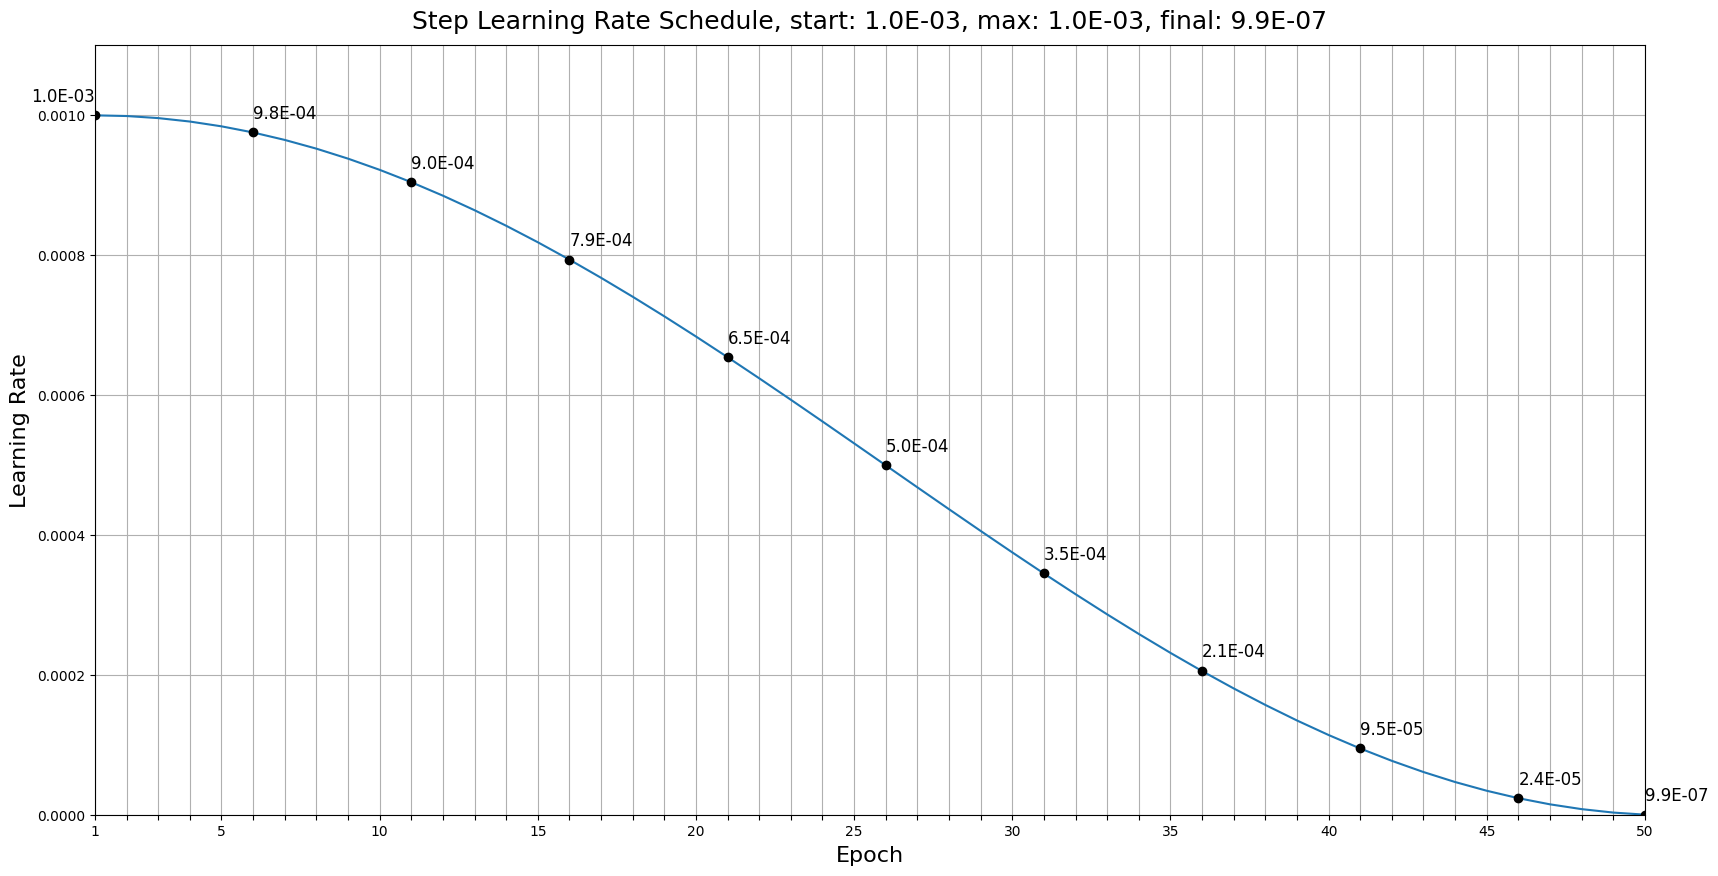

In [342]:
def plot_lr_schedule(lr_schedule, epochs):
    fig = plt.figure(figsize=(20, 10))
    plt.plot([None] + lr_schedule + [None])
    # X Labels
    x = np.arange(1, epochs + 1)
    x_axis_labels = [i if epochs <= 40 or i % 5 == 0 or i == 1 else None for i in range(1, epochs + 1)]
    plt.xlim([1, epochs])
    plt.xticks(x, x_axis_labels) # set tick step to 1 and let x axis start at 1
    
    # Increase y-limit for better readability
    plt.ylim([0, max(lr_schedule) * 1.1])
    
    # Title
    schedule_info = f'start: {lr_schedule[0]:.1E}, max: {max(lr_schedule):.1E}, final: {lr_schedule[-1]:.1E}'
    plt.title(f'Step Learning Rate Schedule, {schedule_info}', size=18, pad=12)
    
    # Plot Learning Rates
    for x, val in enumerate(lr_schedule):
        if epochs <= 40 or x % 5 == 0 or x is epochs - 1:
            if x < len(lr_schedule) - 1:
                if lr_schedule[x - 1] < val:
                    ha = 'right'
                else:
                    ha = 'left'
            elif x == 0:
                ha = 'right'
            else:
                ha = 'left'
            plt.plot(x + 1, val, 'o', color='black');
            offset_y = (max(lr_schedule) - min(lr_schedule)) * 0.02
            plt.annotate(f'{val:.1E}', xy=(x + 1, val + offset_y), size=12, ha=ha)
    
    plt.xlabel('Epoch', size=16, labelpad=5)
    plt.ylabel('Learning Rate', size=16, labelpad=5)
    plt.grid()
    plt.show()

# Learning rate for encoder
LR_SCHEDULE = [lrfn(step, num_warmup_steps=N_WARMUP_EPOCHS, lr_max=LR_MAX, num_cycles=0.50) for step in range(N_EPOCHS)]
# Plot Learning Rate Schedule
plot_lr_schedule(LR_SCHEDULE, epochs=N_EPOCHS)
# Learning Rate Callback
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda step: LR_SCHEDULE[step], verbose=1)
#tf.keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)


# Weight Decay Callback

In [343]:
# Custom callback to update weight decay with learning rate
class WeightDecayCallback(tf.keras.callbacks.Callback):
    def __init__(self, wd_ratio=WD_RATIO):
        self.step_counter = 0
        self.wd_ratio = wd_ratio
    
    def on_epoch_begin(self, epoch, logs=None):
        model.optimizer.weight_decay = model.optimizer.learning_rate * self.wd_ratio
        print(f'learning rate: {model.optimizer.learning_rate.numpy():.2e}, weight decay: {model.optimizer.weight_decay.numpy():.2e}')

# Performance Benchmark

In [344]:
%%timeit -n 100
if TRAIN_MODEL:
    # Verify model prediction is <<<100ms
    model.predict_on_batch({ 'frames': X_train[:1], 'non_empty_frame_idxs': NON_EMPTY_FRAME_IDXS_TRAIN[:1] })
    pass

17.5 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Training

In [345]:
if USE_VAL:
    # Verify Validation Dataset Covers All Signs
    print(f'# Unique Signs in Validation Set: {pd.Series(y_val).nunique()}')
    # Value C
    display(pd.Series(y_val).value_counts().to_frame('Count').iloc[[0,1,2,3]])

# Unique Signs in Validation Set: 1001


,Count
4,40
828,2
614,2
903,2


# Train

In [346]:
if TRAIN_MODEL:
    # Clear all models in GPU
    tf.keras.backend.clear_session()
    #N_EPOCHS = 10
    BATCH_SIZE = 256
    model = get_model2()
    #model.load_weights('model.h5')  
    
    # Actual Training
    history = model.fit(
            x=get_train_batch_all_signs(X_train, y_train, NON_EMPTY_FRAME_IDXS_TRAIN),
            steps_per_epoch=50,
            epochs=N_EPOCHS,
            # Only used for validation data since training data is a generator
            batch_size=BATCH_SIZE,
            validation_data=validation_data,
            callbacks=[
                lr_callback,
                WeightDecayCallback(),
            ],
            verbose = VERBOSE,
        )


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
learning rate: 1.00e-03, weight decay: 5.00e-05
Epoch 1/50


2024-05-28 11:19:40.673825: W tensorflow/core/framework/op_kernel.cc:1827] INVALID_ARGUMENT: ValueError: Could not find callback with key=pyfunc_5 in the registry.
Traceback (most recent call last):

  File "/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 258, in __call__
    raise ValueError(f"Could not find callback with key={token} in the "

ValueError: Could not find callback with key=pyfunc_5 in the registry.


2024-05-28 11:19:40.673903: W tensorflow/core/kernels/data/generator_dataset_op.cc:108] Error occurred when finalizing GeneratorDataset iterator: INVALID_ARGUMENT: ValueError: Could not find callback with key=pyfunc_5 in the registry.
Traceback (most recent call last):

  File "/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 258, in __call__
    raise ValueError(f"Could not find callback with key={token} in the "

ValueError: Could not find callback with key=pyfunc_5 in the registry.


	 [[{{node Py

50/50 - 244s - loss: 11.0044 - acc: 0.2426 - top_5_acc: 0.4478 - top_10_acc: 0.5406 - val_loss: 6.0005 - val_acc: 0.1828 - val_top_5_acc: 0.3951 - val_top_10_acc: 0.5118 - lr: 0.0010 - 244s/epoch - 5s/step

Epoch 2: LearningRateScheduler setting learning rate to 0.0009990133642141358.
learning rate: 9.99e-04, weight decay: 5.00e-05
Epoch 2/50
50/50 - 233s - loss: 3.9684 - acc: 0.6720 - top_5_acc: 0.8995 - top_10_acc: 0.9471 - val_loss: 4.5124 - val_acc: 0.4191 - val_top_5_acc: 0.7147 - val_top_10_acc: 0.8069 - lr: 9.9901e-04 - 233s/epoch - 5s/step

Epoch 3: LearningRateScheduler setting learning rate to 0.000996057350657239.
learning rate: 9.96e-04, weight decay: 4.98e-05
Epoch 3/50
50/50 - 228s - loss: 3.3345 - acc: 0.8384 - top_5_acc: 0.9774 - top_10_acc: 0.9923 - val_loss: 4.2245 - val_acc: 0.5005 - val_top_5_acc: 0.7725 - val_top_10_acc: 0.8534 - lr: 9.9606e-04 - 228s/epoch - 5s/step

Epoch 4: LearningRateScheduler setting learning rate to 0.0009911436253643444.
learning rate: 9.91

In [347]:
model.save('model_final_1001_2.keras')

In [348]:
# Save Model Weights
model.save_weights('model_101_final.h5')

In [349]:
if USE_VAL:
    # Validation Predictions
    y_val_pred = model.predict({ 'frames': X_val, 'non_empty_frame_idxs': NON_EMPTY_FRAME_IDXS_VAL }, verbose=2).argmax(axis=1)
    # Label
    labels = [ORD2SIGN.get(i).replace(' ', '_') for i in range(NUM_CLASSES)]

64/64 - 3s - 3s/epoch - 48ms/step


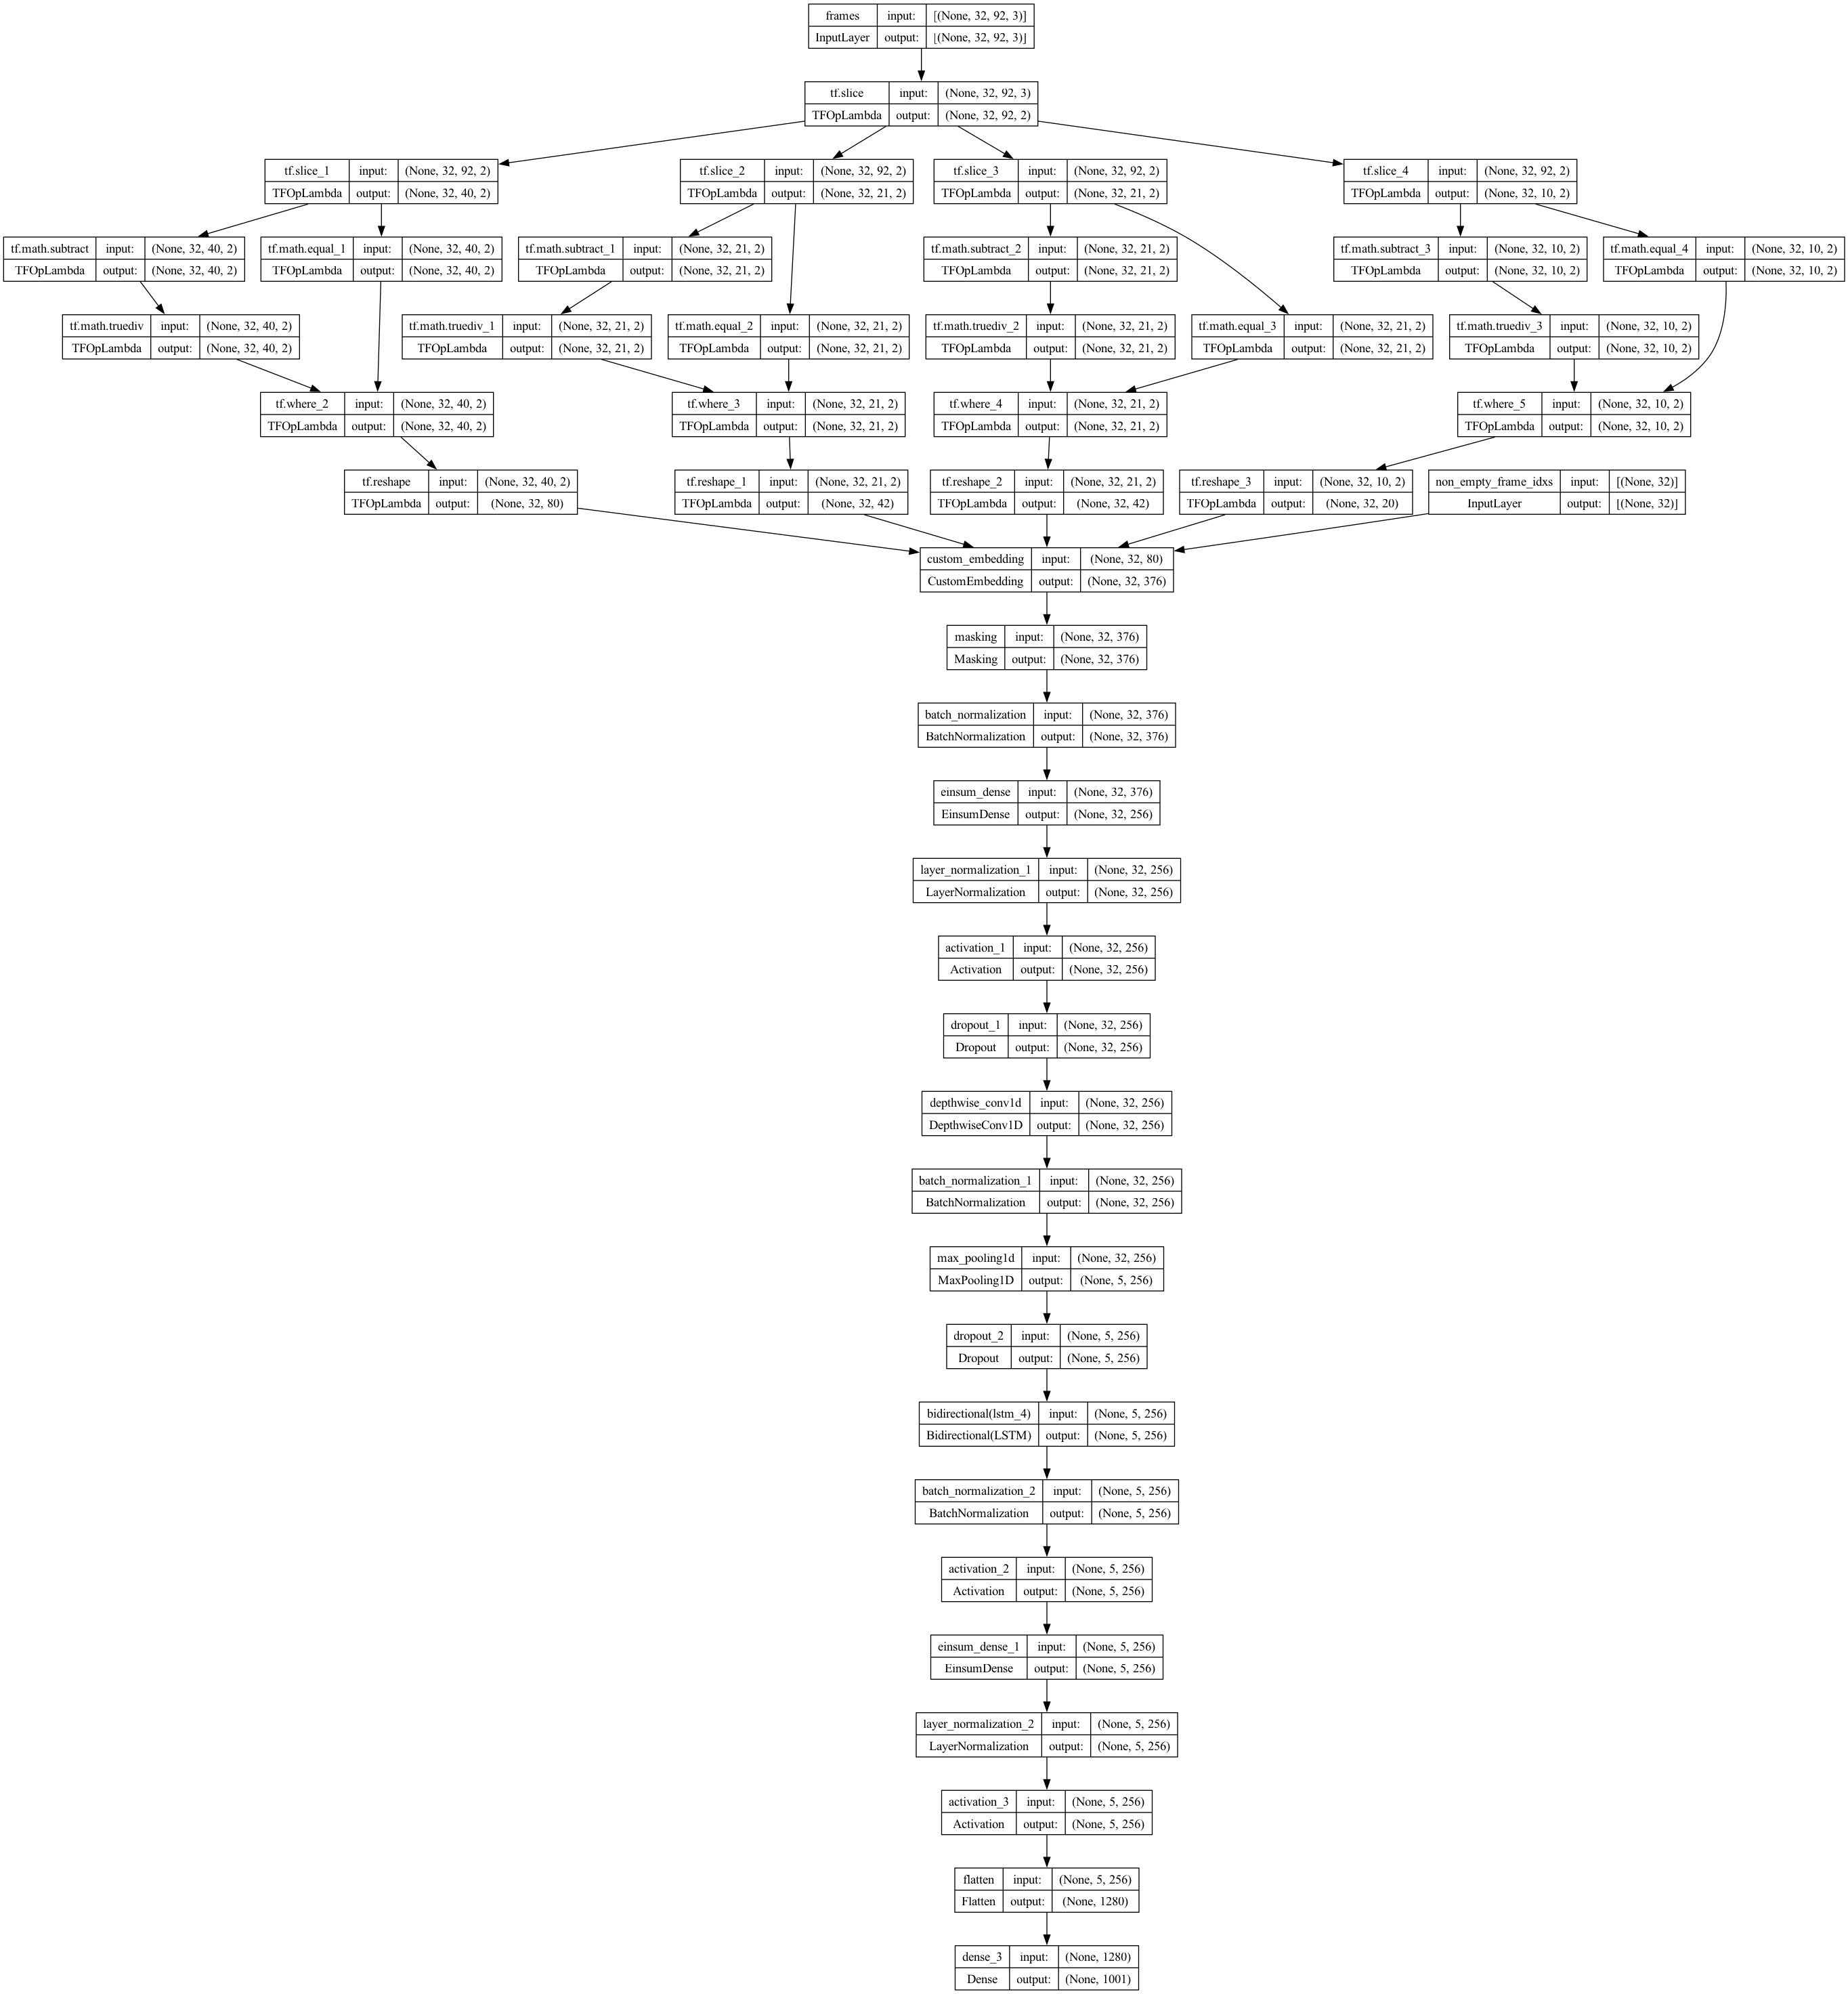

In [47]:
keras.utils.plot_model(model,show_shapes=True)

# Test

In [351]:
y_test_pred = model.predict({ 'frames': X_test, 'non_empty_frame_idxs': NON_EMPTY_FRAME_IDXS_TEST }, verbose=2).argmax(axis=1)
# Label
labels = [ORD2SIGN.get(i).replace(' ', '_') for i in range(NUM_CLASSES)]


160/160 - 7s - 7s/epoch - 44ms/step


In [352]:
metrics.accuracy_score(y_test, y_test_pred)

0.9501960784313725

# Landmark Attention Weights

In [354]:
# Landmark Weights
for w in model.get_layer('custom_embedding').weights:
    if 'landmark_weights' in w.name:
        weights = scipy.special.softmax(w)

landmarks = ['lips_embedding', 'left_hand_embedding', 'pose_embedding']

for w, lm in zip(weights, landmarks):
    print(f'{lm} weight: {(w*100):.1f}%')

lips_embedding weight: 20.5%
left_hand_embedding weight: 27.6%
pose_embedding weight: 24.5%


# Classification Report

In [355]:
def print_classification_report():
    # Classification report for all signs
    classification_report = sklearn.metrics.classification_report(
            y_val,
            y_val_pred,
            target_names=labels,
            output_dict=True,
        )
    # Round Data for better readability
    classification_report = pd.DataFrame(classification_report).T
    classification_report = classification_report.round(2)
    classification_report = classification_report.astype({
            'support': np.uint16,
        })
    # Add signs
    classification_report['text'] = [e if e in SIGN2ORD else -1 for e in classification_report.index]
    classification_report['sign_ord'] = classification_report['text'].apply(SIGN2ORD.get).fillna(-1).astype(np.int16)
    # Sort on F1-score
    classification_report = pd.concat((
        classification_report.head(NUM_CLASSES).sort_values('f1-score', ascending=False),
        classification_report.tail(3),
    ))

    pd.options.display.max_rows = 999
    classification_report.to_csv("report.csv")
    display(classification_report.head())

In [356]:
if USE_VAL:
    print_classification_report()

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,precision,recall,f1-score,support,text,sign_ord
2_часа,1.0,1.0,1.0,2,2_часа,0
красивый,1.0,1.0,1.0,2,красивый,429
навсегда,1.0,1.0,1.0,2,навсегда,518
наблюдательность,1.0,1.0,1.0,2,наблюдательность,516
мятежный,1.0,1.0,1.0,2,мятежный,515


In [357]:
my_report = pd.read_csv("report.csv")
my_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1004 non-null   object 
 1   precision   1004 non-null   float64
 2   recall      1004 non-null   float64
 3   f1-score    1004 non-null   float64
 4   support     1004 non-null   int64  
 5   text        1004 non-null   object 
 6   sign_ord    1004 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 55.0+ KB


In [358]:
def get_text_type(col):
    if len(col) == 1:
        return "sign"
    if len(col.split("_")) > 1:
        return "phrase"
    return "word"

my_report["pred_type"] = my_report["text"].apply(get_text_type)
my_report


,Unnamed: 0,precision,recall,f1-score,support,text,sign_ord,pred_type
0,2_часа,1.00,1.00,1.00,2,2_часа,0,phrase
1,красивый,1.00,1.00,1.00,2,красивый,429,word
2,навсегда,1.00,1.00,1.00,2,навсегда,518,word
3,наблюдательность,1.00,1.00,1.00,2,наблюдательность,516,word
4,мятежный,1.00,1.00,1.00,2,мятежный,515,word
...,...,...,...,...,...,...,...,...
999,обезьяна,0.00,0.00,0.00,2,обезьяна,593,word
1000,боюсь,0.00,0.00,0.00,2,боюсь,113,word
1001,accuracy,0.63,0.63,0.63,0,-1,-1,word
1002,macro avg,0.63,0.63,0.60,2040,-1,-1,word


In [359]:
def print_metrics_by_type(df, nums=3):
    pred_types = ["sign", "word", "phrase"]
    
    for pred_type in pred_types:
        filtered_df = df[df["pred_type"] == pred_type]
        
        precision_mean = round(filtered_df["precision"].mean(), nums)
        recall_mean = round(filtered_df["recall"].mean(), nums)
        f1_mean = round(filtered_df["f1-score"].mean(), nums)
        
        print(pred_type + ":\n", "precision: " + str(precision_mean), "recall: " + str(recall_mean), 
              "f1_score: " + str(f1_mean), sep="\t", end="\n")
        
print_metrics_by_type(my_report)

sign:
	precision: 0.518	recall: 0.614	f1_score: 0.529
word:
	precision: 0.621	recall: 0.616	f1_score: 0.592
phrase:
	precision: 0.837	recall: 0.767	f1_score: 0.785


# Training History

In [360]:
def plot_history_metric(metric, f_best=np.argmax, ylim=None, yscale=None, yticks=None):
    plt.figure(figsize=(20, 10))
    
    values = history.history[metric]
    N_EPOCHS = len(values)
    val = 'val' in ''.join(history.history.keys())
    # Epoch Ticks
    if N_EPOCHS <= 20:
        x = np.arange(1, N_EPOCHS + 1)
    else:
        x = [1, 5] + [10 + 5 * idx for idx in range((N_EPOCHS - 10) // 5 + 1)]

    x_ticks = np.arange(1, N_EPOCHS+1)

    # Validation
    if val:
        val_values = history.history[f'val_{metric}']
        val_argmin = f_best(val_values)
        plt.plot(x_ticks, val_values, label=f'val')

    # summarize history for accuracy
    plt.plot(x_ticks, values, label=f'train')
    argmin = f_best(values)
    plt.scatter(argmin + 1, values[argmin], color='red', s=75, marker='o', label=f'train_best')
    if val:
        plt.scatter(val_argmin + 1, val_values[val_argmin], color='purple', s=75, marker='o', label=f'val_best')

    plt.title(f'Model {metric}', fontsize=24, pad=10)
    plt.ylabel(metric, fontsize=20, labelpad=10)

    if ylim:
        plt.ylim(ylim)

    if yscale is not None:
        plt.yscale(yscale)
        
    if yticks is not None:
        plt.yticks(yticks, fontsize=16)

    plt.xlabel('epoch', fontsize=20, labelpad=10)        
    plt.tick_params(axis='x', labelsize=8)
    plt.xticks(x, fontsize=16) # set tick step to 1 and let x axis start at 1
    plt.yticks(fontsize=16)
    
    plt.legend(prop={'size': 10})
    plt.grid()
    plt.show()

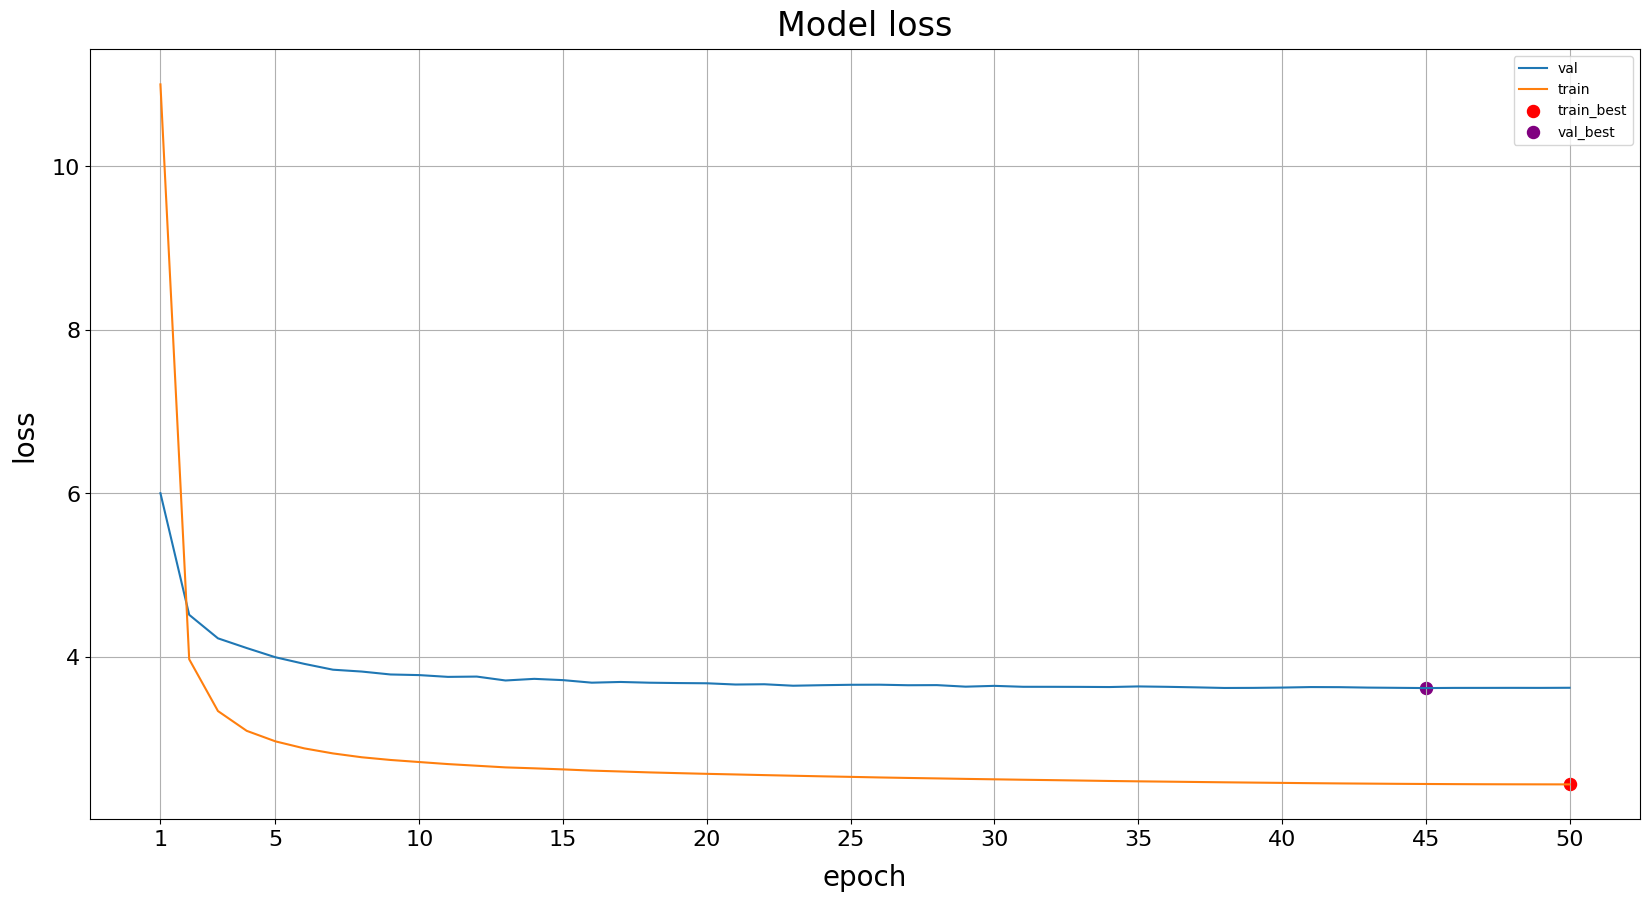

In [361]:
if TRAIN_MODEL:
    plot_history_metric('loss', f_best=np.argmin)

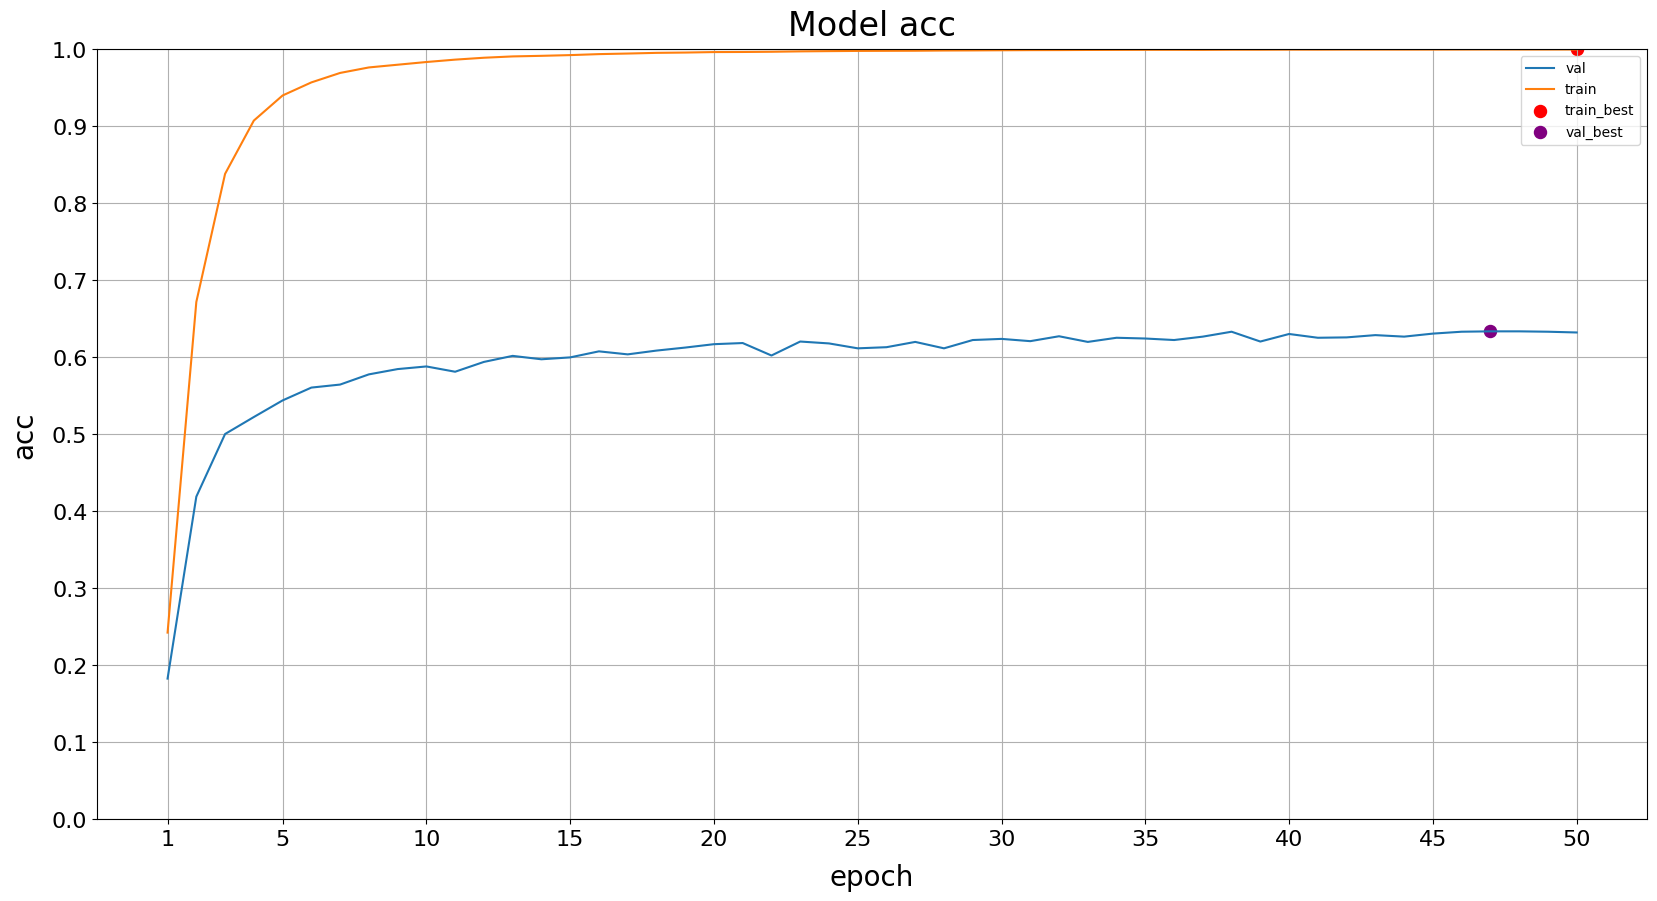

In [362]:
if TRAIN_MODEL:
    plot_history_metric('acc', ylim=[0,1], yticks=np.arange(0.0, 1.1, 0.1))

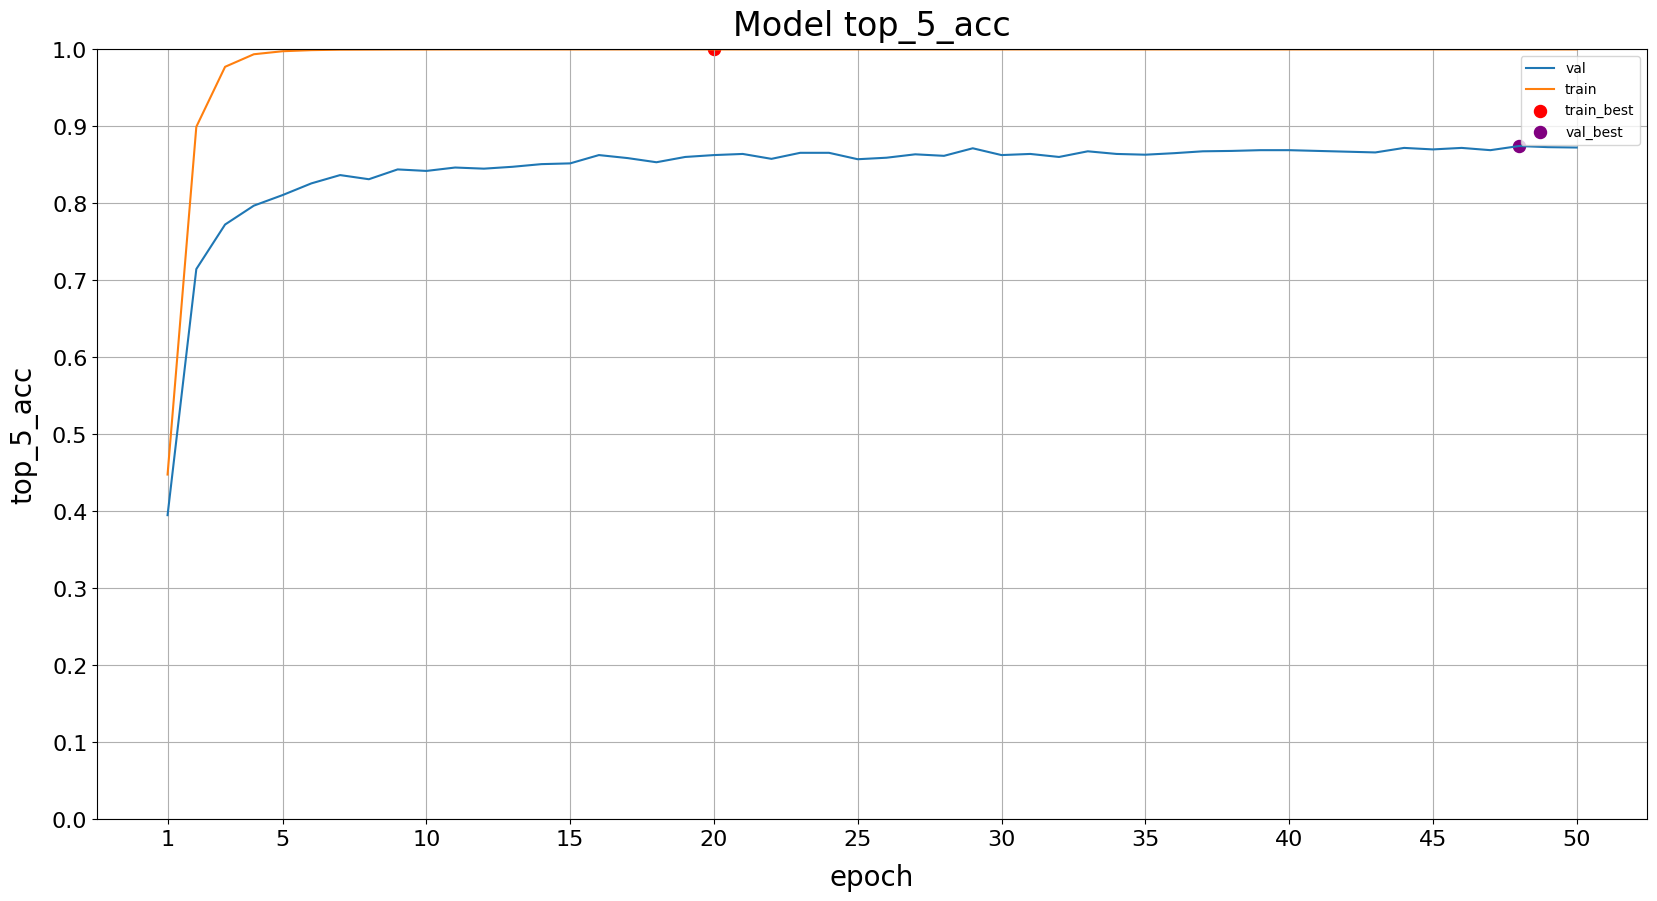

In [363]:
if TRAIN_MODEL:
    plot_history_metric('top_5_acc', ylim=[0,1], yticks=np.arange(0.0, 1.1, 0.1))

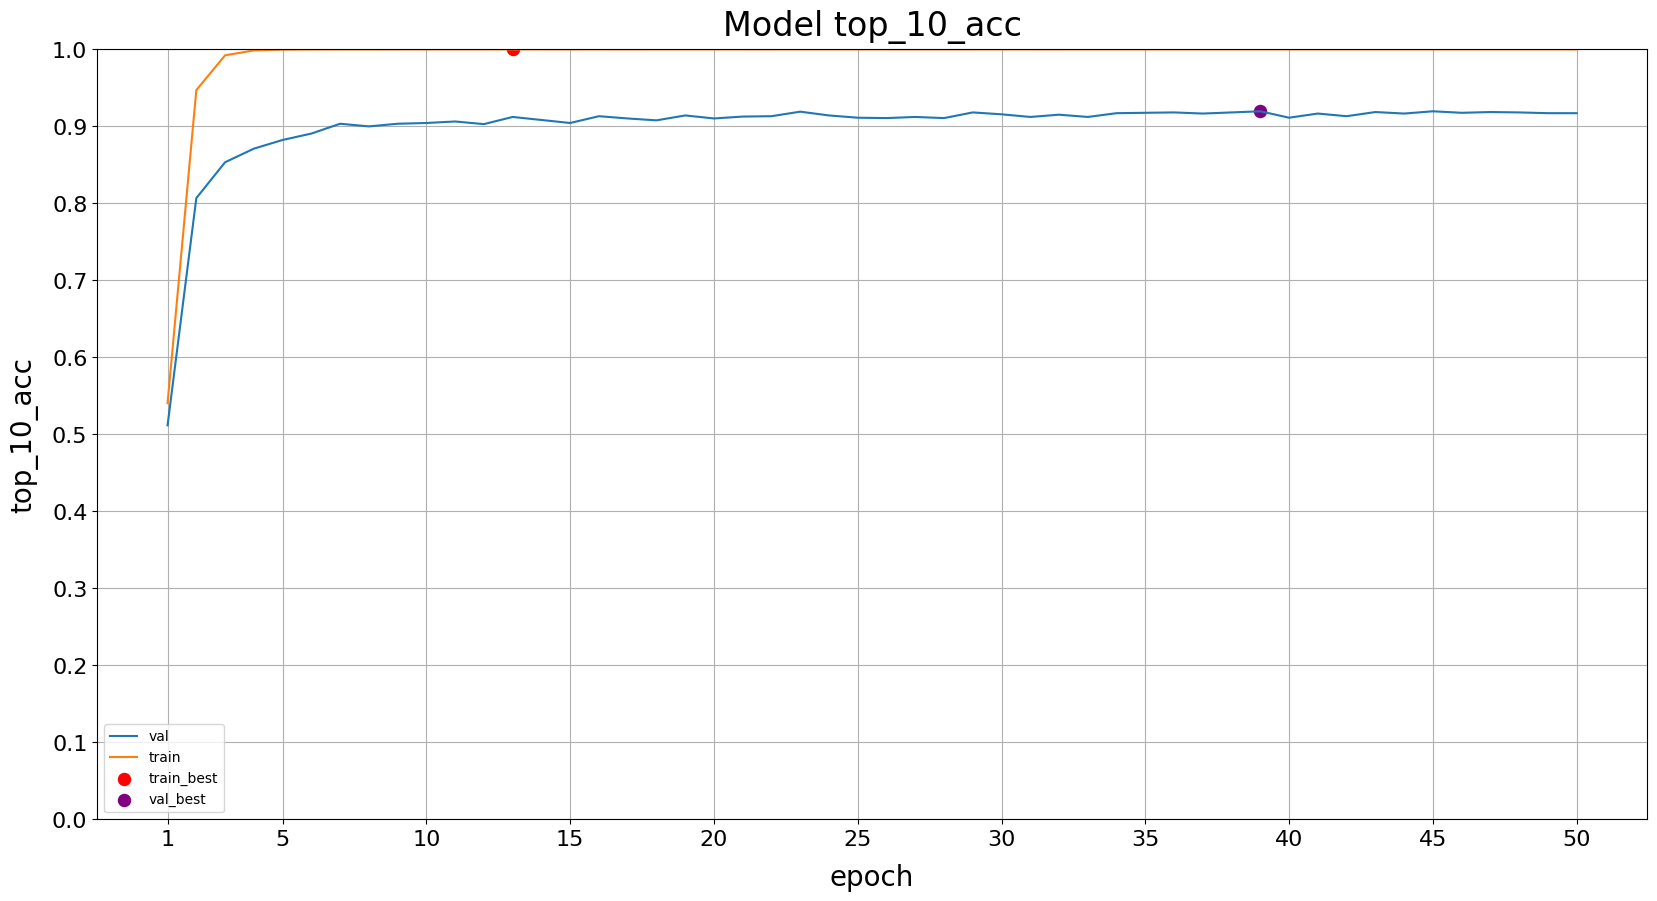

In [364]:
if TRAIN_MODEL:
    plot_history_metric('top_10_acc', ylim=[0,1], yticks=np.arange(0.0, 1.1, 0.1))

# TFLite Model

Сode loosley based on [this notebook](https://www.kaggle.com/code/dschettler8845/gislr-learn-eda-baseline#baseline) by [Darien Schettler
](https://www.kaggle.com/dschettler8845)

In [365]:
# TFLite model for submission
class TFLiteModel(tf.Module):
    def __init__(self, model):
        super(TFLiteModel, self).__init__()

        # Load the feature generation and main models
        self.preprocess_layer = preprocess_layer
        self.model = model
    
    @tf.function(input_signature=[tf.TensorSpec(shape=[None, N_ROWS, N_DIMS], dtype=tf.float32, name='inputs')])
    def __call__(self, inputs):
        # Preprocess Data
        x, non_empty_frame_idxs = self.preprocess_layer(inputs)
        # Add Batch Dimension
        x = tf.expand_dims(x, axis=0)
        non_empty_frame_idxs = tf.expand_dims(non_empty_frame_idxs, axis=0)
        # Make Prediction
        outputs = self.model({ 'frames': x, 'non_empty_frame_idxs': non_empty_frame_idxs })
        # Squeeze Output 1x250 -> 250
        outputs = tf.squeeze(outputs, axis=0)

        # Return a dictionary with the output tensor
        return {'outputs': outputs}

# Define TF Lite Model
tflite_keras_model = TFLiteModel(model)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 frames (InputLayer)         [(None, 32, 92, 3)]          0         []                            
                                                                                                  
 tf.slice (TFOpLambda)       (None, 32, 92, 2)            0         ['frames[0][0]']              
                                                                                                  
 tf.slice_1 (TFOpLambda)     (None, 32, 40, 2)            0         ['tf.slice[0][0]']            
                                                                                                  
 tf.slice_2 (TFOpLambda)     (None, 32, 21, 2)            0         ['tf.slice[0][0]']            
                                                                                              

In [366]:
# Create Model Converter


keras_model_converter = tf.lite.TFLiteConverter.from_keras_model(tflite_keras_model)
keras_model_converter.optimizations = [tf.lite.Optimize.DEFAULT]
keras_model_converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Enable TensorFlow Lite ops.
    tf.lite.OpsSet.SELECT_TF_OPS,  # Enable TensorFlow ops.
]

keras_model_converter.experimental_new_converter = True
keras_model_converter.enable_resource_variables = True
# Convert Model
tflite_model = keras_model_converter.convert()

# Write Model
with open('model_final_1001.tflite', 'wb') as f:
    f.write(tflite_model)
    
# Zip Model
!zip submission.zip model_final_1001.tflite

INFO:tensorflow:Assets written to: /var/folders/j2/_pbxyqc11vnf9ykjph7lzbv00000gn/T/tmpn4w0mlvp/assets


INFO:tensorflow:Assets written to: /var/folders/j2/_pbxyqc11vnf9ykjph7lzbv00000gn/T/tmpn4w0mlvp/assets
2024-05-28 14:37:01.346421: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-05-28 14:37:01.346606: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-05-28 14:37:01.347720: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/j2/_pbxyqc11vnf9ykjph7lzbv00000gn/T/tmpn4w0mlvp
2024-05-28 14:37:01.362029: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-05-28 14:37:01.362047: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/j2/_pbxyqc11vnf9ykjph7lzbv00000gn/T/tmpn4w0mlvp
2024-05-28 14:37:01.405186: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-05-28 14:37:01.669829: I tensorflow/cc/saved_model/loader.cc:217] Running initialization

updating: model_final_1001.tflite (deflated 22%)
